In [258]:
### Imports and Initial Setup

In [109]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

# Setting max rows to 50 to display all the summary data
pd.set_option("display.max_rows", 50)

# Suppress warnings
warnings.filterwarnings('ignore')

In [110]:
#Got low_memory warning because pandas try to determine what dtype to set by analyzing the data in each column. To silent the warning I have sset low_memory to false
loan_df = pd.read_csv("/Users/bandaanilreddy/Downloads/loan.csv", low_memory=False)

In [111]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [112]:
# Print summary of all Nulls and Blanks in the dataset
(loan_df.isnull().sum()/len(loan_df.index) * 100)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [113]:
# Loading all data dictionary values
dict = pd.read_excel('/Users/bandaanilreddy/Downloads/Data_Dictionary.xlsx')
dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [114]:
previous_rows_count = len(loan_df)

# Dropping the rows whose loan_status = Current, as they don't contribute to the decisions.
loan_df = loan_df[loan_df['loan_status'] != "Current"]

current_rows_count = len(loan_df)

print("Rows dropped where loan_status = 'Current':", (previous_rows_count - current_rows_count))
print("Percentage of rows dropped = ", round((previous_rows_count - current_rows_count)/previous_rows_count*100,2),"%")

Rows dropped where loan_status = 'Current': 1140
Percentage of rows dropped =  2.87 %


In [115]:
# Finding duplicate rows in the loan dataset
duplicate_rows_count = len(loan_df[loan_df.duplicated()])
if duplicate_rows_count <= 0:
    print("No Duplicate Rows Found")
else:
    print("Duplicate Rows Found: ", duplicate_rows_count)

No Duplicate Rows Found


In [116]:
# Dropping memberId as it is unique and cannot be used for analysis 
loan_df = loan_df.drop(['member_id'],  axis=1)

In [117]:
# Droping description columns and url
loan_df = loan_df.drop(['url', 'emp_title', 'desc', 'title'],  axis=1)

In [118]:
# Now removing the columns from the data set which are unused for better analysis
loan_df = loan_df.drop(['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d', 
                          'application_type'],  axis=1)

In [119]:
print("Total columns with values NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", loan_df.columns[loan_df.isna().all()].tolist())

Total columns with values NA:  55 


Columns with all values as NA
 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_7

In [120]:
# Dropping all the columns whose all values are NaN or Null
loan_df = loan_df.dropna(axis='columns', how="all")

In [121]:
# Dropping all columns whose all values are zero
loan_df = loan_df.loc[:, (loan_df != 0).any(axis=0)]

In [122]:
# Function to Drop all columns having constant values (ignoring NA value)
# If we have 1,2 and NA, the column wont be dropped
print("Columns with constant values with or without NA")
def drop_constant_value_columns(df):
    for c in df.columns:
        if df[c].nunique(dropna=True) == 1:
            print(c)
            df = df.drop(c, axis=1)
    return df

loan_df = drop_constant_value_columns(loan_df)

Columns with constant values with or without NA
pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
chargeoff_within_12_mths
tax_liens


In [123]:
# Function checks  empty values in a dataframe and drops the column if the amount of empty values is more than 65%
# 60% is the threshhold percentage which decides imputing vs dropping 
print("Columns with more that 65% empty records")
def drop_columns_with_max_empty(df):
    total_rows = len(df)
    for c in df.columns:
        # Drop columns whose mean NA values exceed 65%
        if df[c].isna().mean().round(2) >= 0.65:
            print(c)
            df = df.drop(c, axis=1)
    return df
loan_df = drop_columns_with_max_empty(loan_df)

Columns with more that 65% empty records
mths_since_last_delinq
mths_since_last_record


In [124]:
# Convert 'loan_amnt' and 'funded_amnt' columns to flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})

In [125]:
# Convert the 'term' column into an integer
loan_df['term'] = loan_df['term'].apply(lambda x : int(x[:-7]))

In [126]:
# Convert the 'int_rate' column to  float by removing the "%" character
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : float(x[:-1]))

In [127]:
# Round off the float value fields to 2 decimal place
print("Round columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))

Round columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [128]:
# Converting the loan_status string column to boolean column. "Fully-Paid is True and Charged Off is False"
# Now this func will only convert to boolean if the column is a string and has the two specific values as we have removed Current String
def convert_loan_status_to_boolean(x):
    if x == "Fully Paid":
        return True
    elif x == "Charged Off":
        return False
    else:
        return x

In [129]:
# Converting the issue_d column from string object to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [130]:
# Identify columns having blank values and the percentage of total values which are blanks. 
print('emp_length blank rows', loan_df['emp_length'].isna().sum())
print('pub_rec_bankruptcies blank rows', loan_df['pub_rec_bankruptcies'].isna().sum(), "\n")
imp_total = 0
for c in loan_df.columns[loan_df.isna().any()].tolist():
    imp_val = len(loan_df[loan_df[c].isna()]) / len(loan_df) * 100
    imp_total += imp_val
    print(c, round(imp_val, 2),"%")
print("\nTotal rows percentage whose columns are blank: ", round(imp_total ,2), "%")

emp_length blank rows 1033
pub_rec_bankruptcies blank rows 697 

emp_length 2.68 %
pub_rec_bankruptcies 1.81 %

Total rows percentage whose columns are blank:  4.48 %


In [131]:
# Converting emp_length string to integer values
loan_df['emp_length'] = loan_df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

In [132]:
before_rows = len(loan_df)
print(before_rows)

38577


In [133]:
# Drop the rows with empty values
loan_df = loan_df[loan_df['emp_length'].notna()]
loan_df = loan_df[loan_df['pub_rec_bankruptcies'].notna()]


In [134]:
# Checking blanks if exist
loan_df['emp_length'].value_counts()

10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: emp_length, dtype: int64

In [135]:
loan_df.shape

(36847, 20)

In [136]:
# Adding columns for Year and Month for analysis extrating Year and Month from issue_d
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [137]:
# Changing Months to quarters
def change_months_to_quarters(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4' # 75% quartile
    
loan_df['issue_q'] = loan_df.apply(lambda x : change_months_to_quarters(x['issue_m']), axis = 1)

In [138]:
loan_df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [139]:
# Changing Loan Amount
def change_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan_df['loan_amnt_b'] = loan_df.apply(lambda x : change_loan_amnt(x['loan_amnt']), axis = 1)

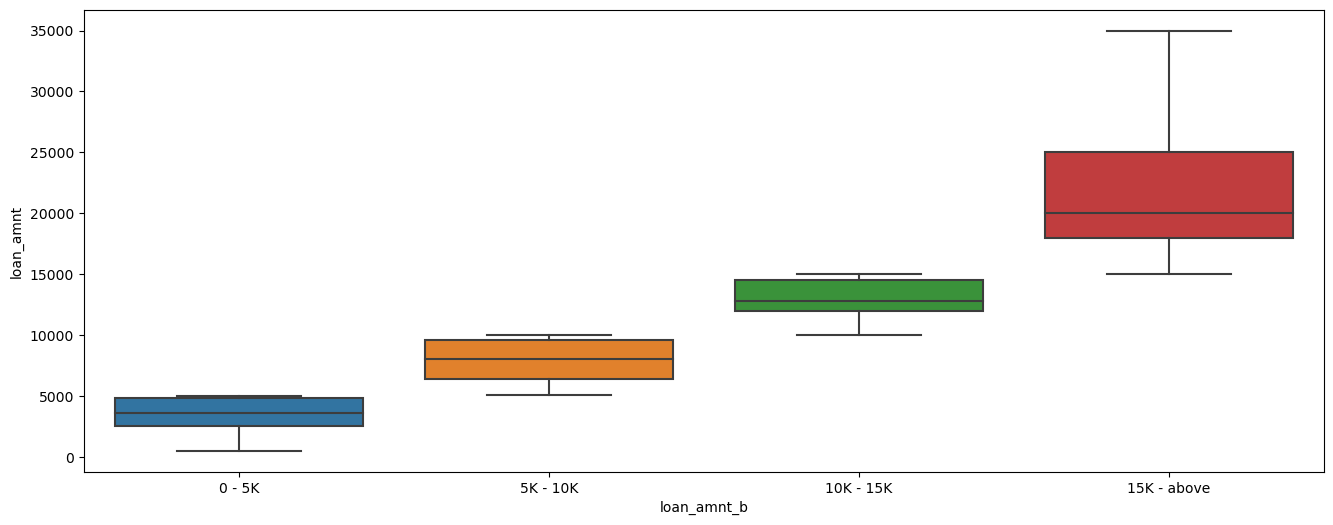

In [140]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.loan_amnt_b)
plot.show()

In [141]:
loan_df['funded_amnt_inv'].describe()

count    36847.000000
mean     10430.400868
std       7008.919433
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [142]:
# Changing Funded Amount
def change_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan_df['funded_amnt_inv_b'] = loan_df.apply(lambda x : change_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

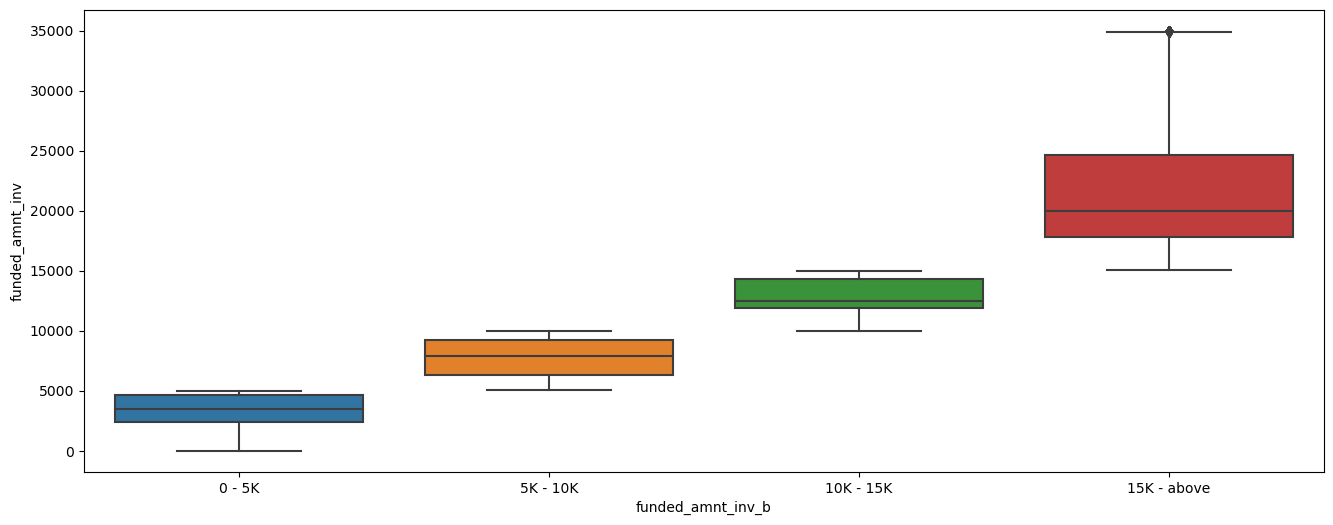

In [143]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.funded_amnt_inv,x=loan_df.funded_amnt_inv_b)
plot.show()

In [144]:
loan_df['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [145]:
# Changing Funded Amount
def change_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan_df['funded_amnt_b'] = loan_df.apply(lambda x : change_funded_amnt(x['funded_amnt']), axis = 1)

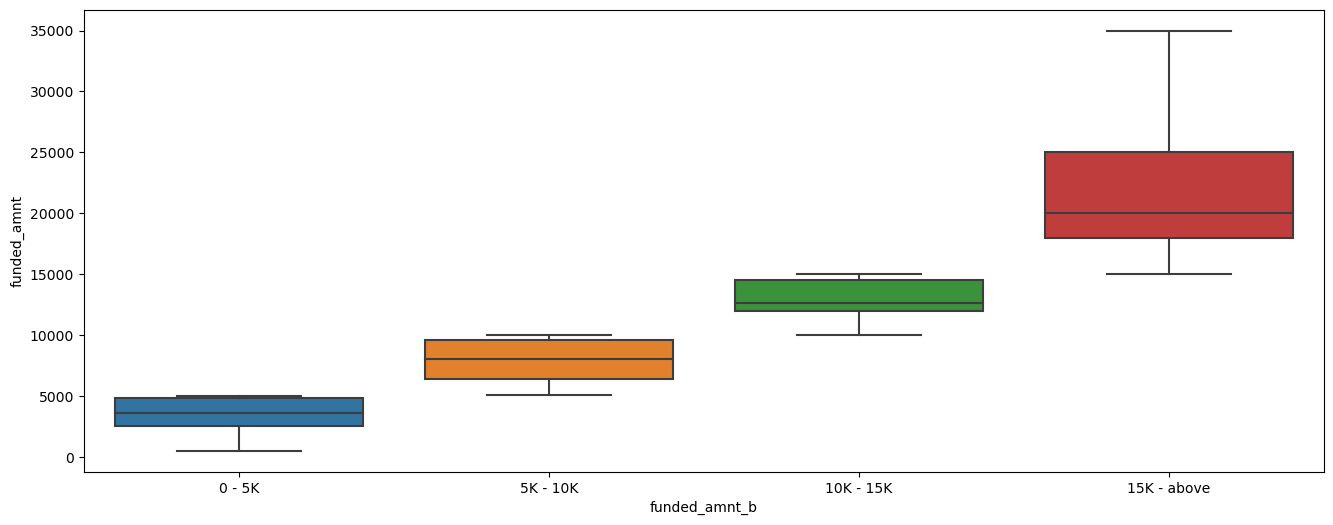

In [146]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.funded_amnt,x=loan_df.funded_amnt_b)
plot.show()

In [147]:
loan_df['annual_inc'].describe() / 1000

count      36.847000
mean       69.404482
std        64.027473
min         4.000000
25%        41.004000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [148]:
# Changing Annual Income
def change_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: change_annual_inc(x['annual_inc']), axis = 1)

In [149]:
loan_df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [150]:
# Changing interest rate
def change_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan_df['int_rate_b'] = loan_df.apply(lambda x : change_int_rate(x.int_rate), axis = 1)

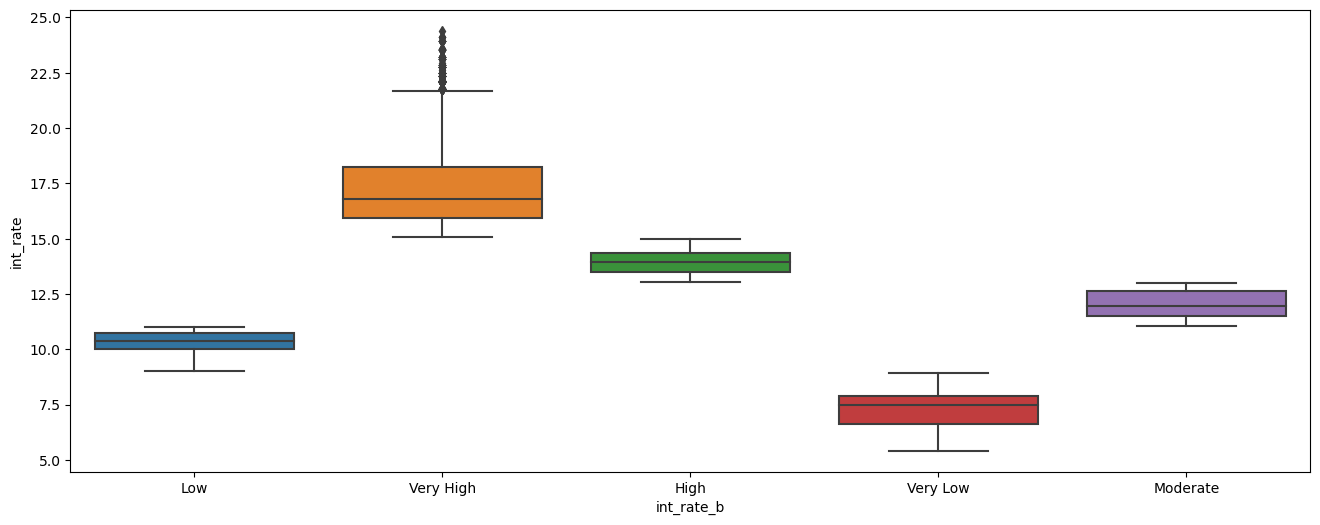

In [151]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.int_rate,x=loan_df.int_rate_b)
plot.show()

In [152]:
loan_df['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [153]:
# Changing dti
def change_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'    
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan_df['dti_b'] = loan_df.apply(lambda x : change_dti(x.dti), axis = 1)

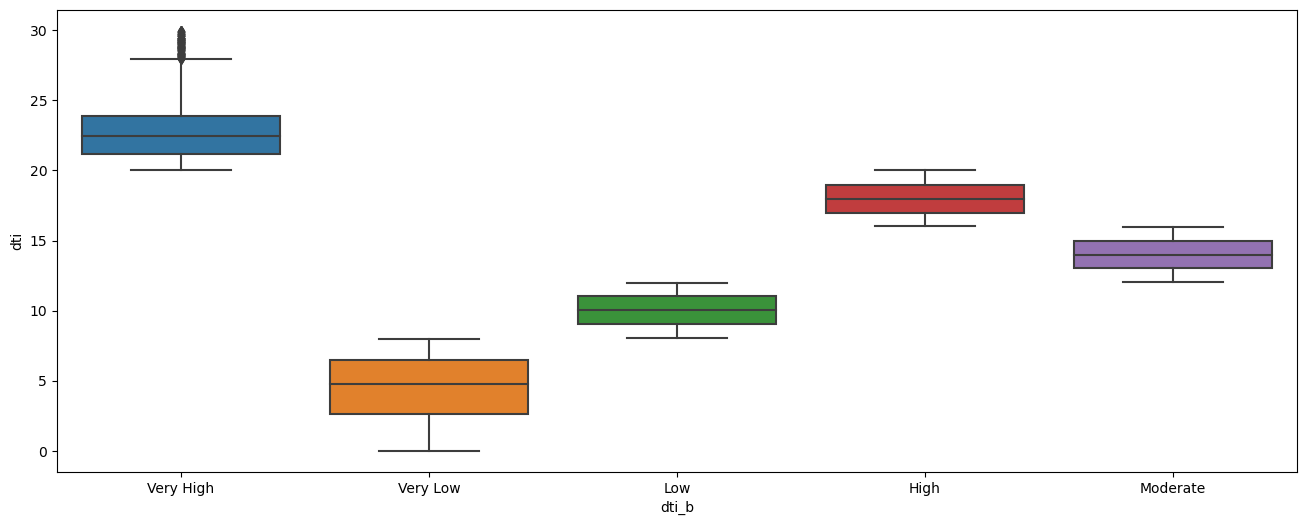

In [154]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.dti,x=loan_df.dti_b)
plot.show()

In [155]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   sub_grade             36847 non-null  object        
 9   emp_length            36847 non-null  float64       
 10  home_ownership        36847 non-null  object        
 11  annual_inc            36847 non-null  float64       
 12  verification_status   36847 non-null  object        
 13  issue_d         

In [156]:
loan_df.shape

(36847, 29)

In [157]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_y', 'issue_m', 'issue_q', 'loan_amnt_b', 'funded_amnt_inv_b',
       'funded_amnt_b', 'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

In [158]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [159]:
# This function creates a dictionary of outliers which includes the inter quartile range, 
# lower and upper bound for a particular column.
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}


# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plot.subplots(1,2,figsize=(14, 3))
    splot1 = sea.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers    
    splot2 = sea.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()
    
def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [160]:
def univariate_analysis(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

In [210]:
# Bivariate analysis of columns against loan_status and calculate the ratio of Charge Offs
def analysis_vs_loan_status(df, col):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    splot = sea.countplot(df[col], ax=p[0])
    splot.set_xticklabels(splot.get_xticklabels(), rotation=90);
    p[0].set_title('['+ col + '] - loan_status=all')
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plot.bar(ax=p[1], stacked=True)
    p[1].set_title('['+ col + '] - Stacked')
    plot.show()


def continious_column_analysis(df, column):
    f, (ax1, ax2) = plot.subplots(nrows=1, ncols=2, figsize=(16,4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    sea.boxplot(x=column, y='loan_status', data=df, ax=ax2)
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column] + 'by Loan Status')
    plot.tight_layout()
    plot.show()
    # return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plot(kind='bar', figsize=[16,4])
    plot.show()


def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column,invert=False):
    plot.figure(figsize=[20,8])
    plot.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sea.barplot(x = rw['charge_off_ratio'], y = rw[column], alpha=0.8)
    else:
        sea.barplot(x = rw[column], y = rw['charge_off_ratio'], alpha=0.8)
    plot.tight_layout()
    plot.show()
    return rw

def series_plot(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plot.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sea.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plot.show()

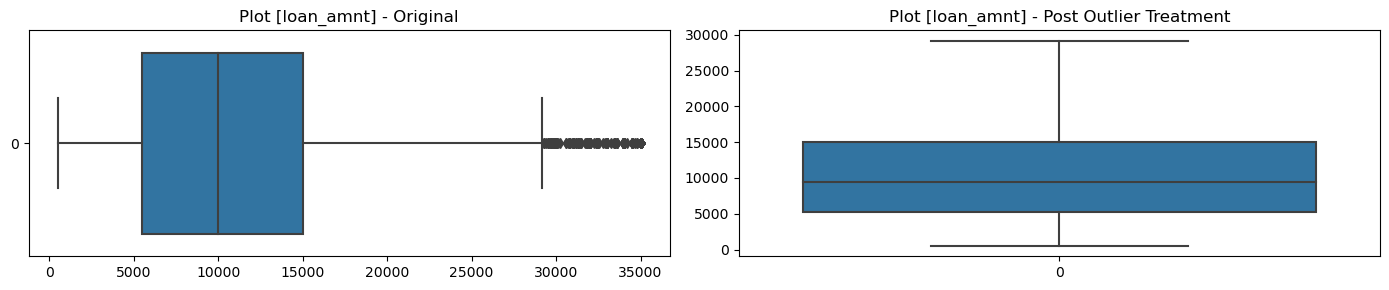

Rows dropped:  1078
Percentage rows dropped:  2.93 %


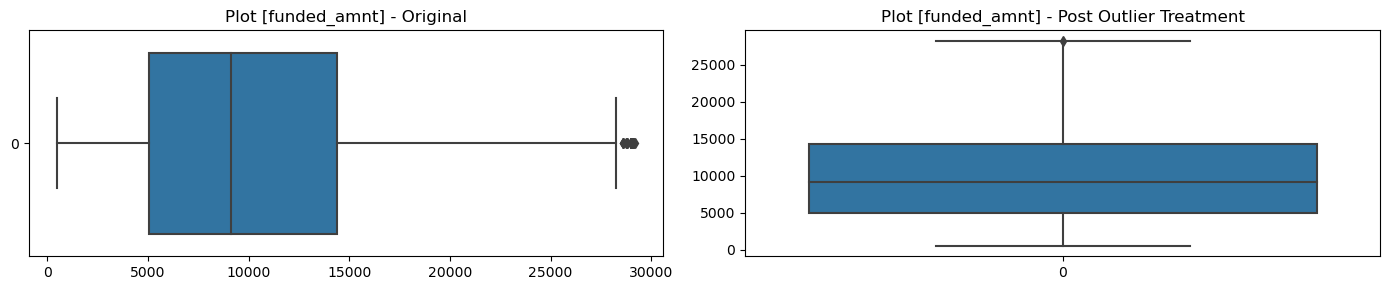

Rows dropped:  30
Percentage rows dropped:  0.08 %


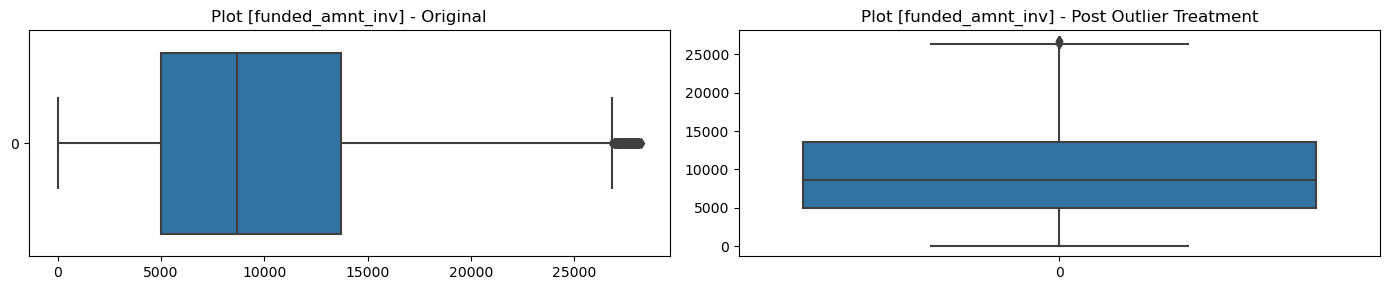

Rows dropped:  153
Percentage rows dropped:  0.43 %


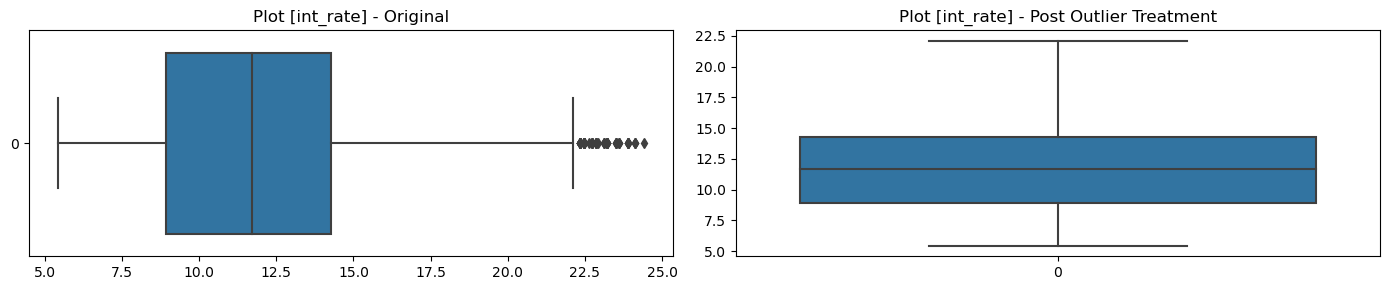

Rows dropped:  63
Percentage rows dropped:  0.18 %


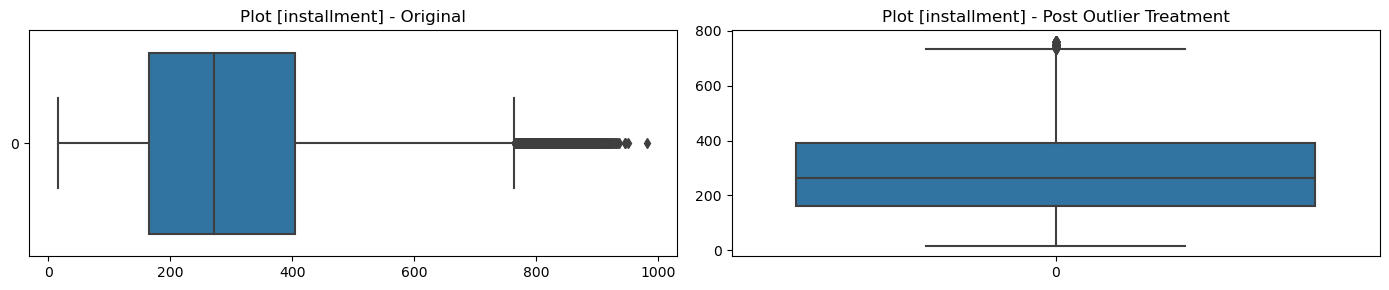

Rows dropped:  981
Percentage rows dropped:  2.76 %


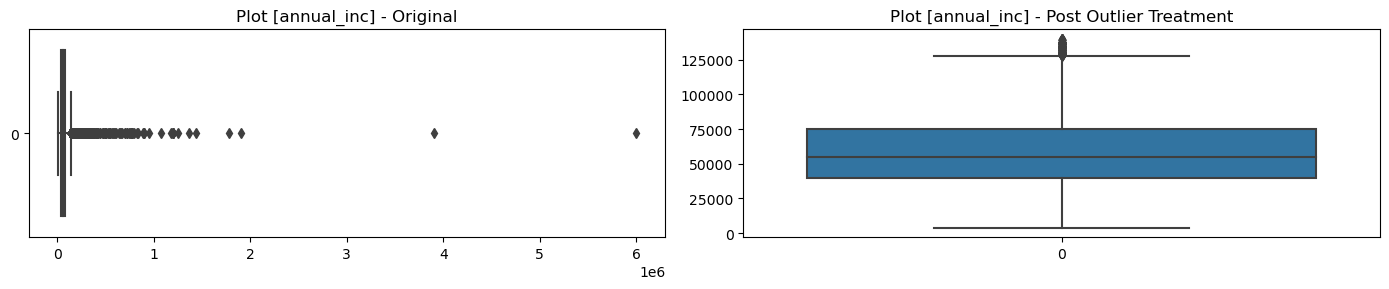

Rows dropped:  1486
Percentage rows dropped:  4.3 %


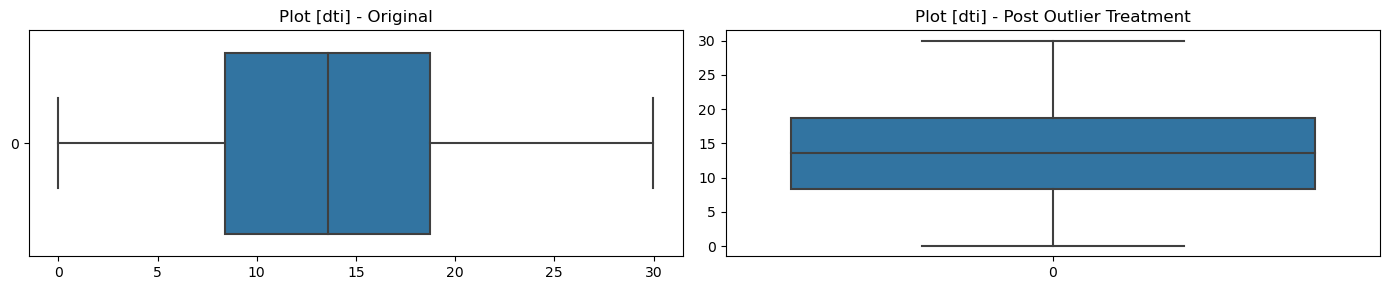

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [162]:
original_row_count = len(loan_df)

outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
for column in outlier_treatment:
    outlier_comparison(loan_df, column)
    loan_df = drop_outlier(loan_df, column)

In [163]:
new_row_count = len(loan_df)
print('number of rows dropped: ', original_row_count - new_row_count)
print('Percentage of rows dropped: ', round((original_row_count - new_row_count)/original_row_count*100,2), "%")

number of rows dropped:  3791
Percentage of rows dropped:  10.29 %


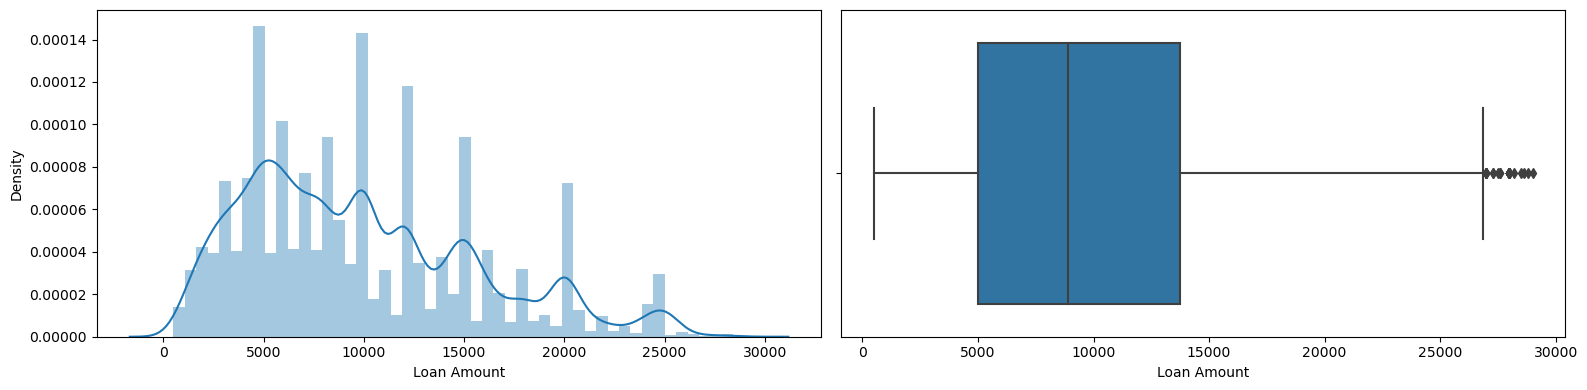

In [164]:
univariate_analysis(loan_df, 'loan_amnt')

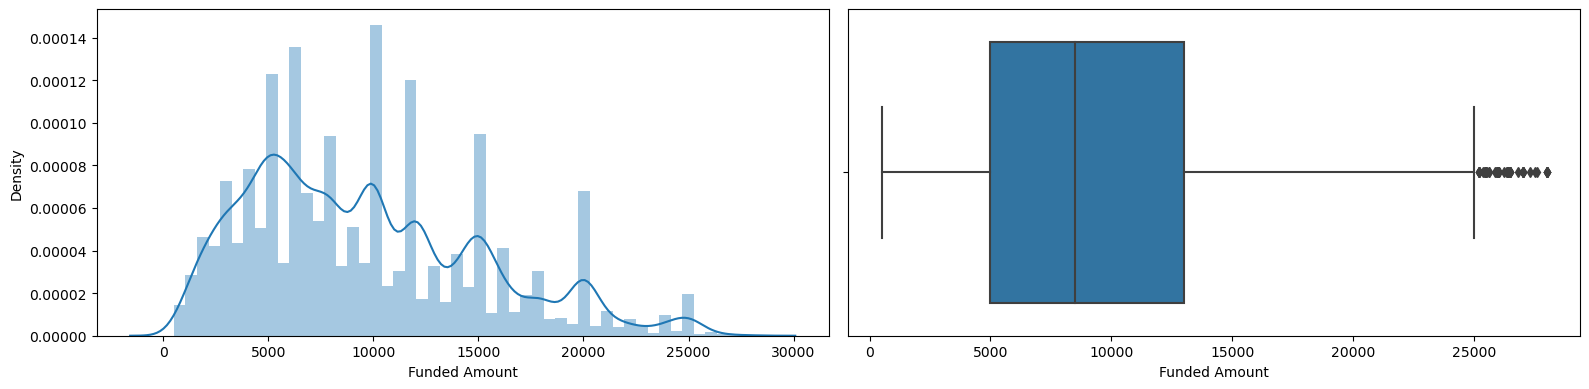

In [165]:
univariate_analysis(loan_df, 'funded_amnt')


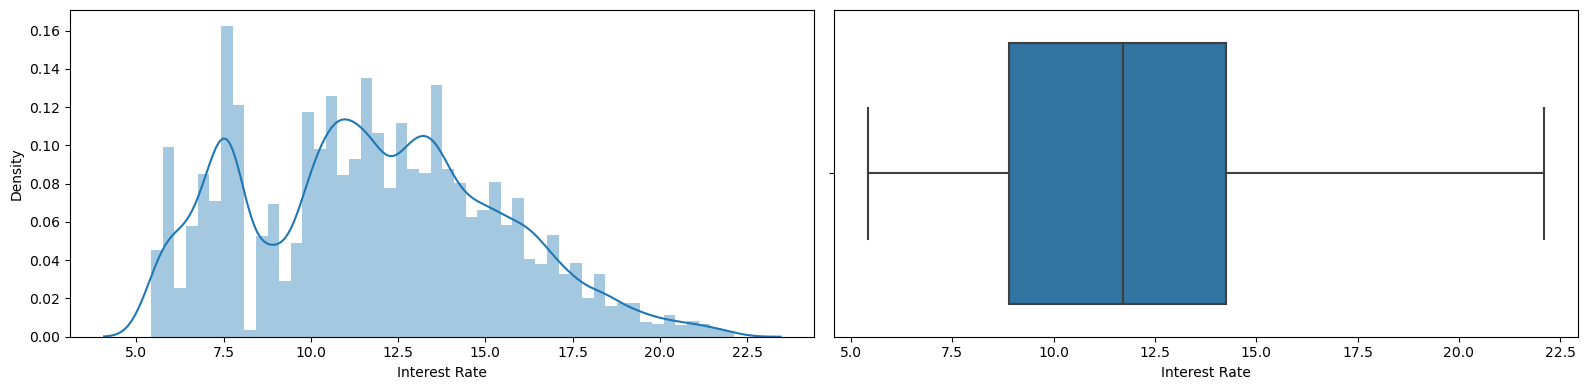

In [166]:
univariate_analysis(loan_df, 'int_rate')

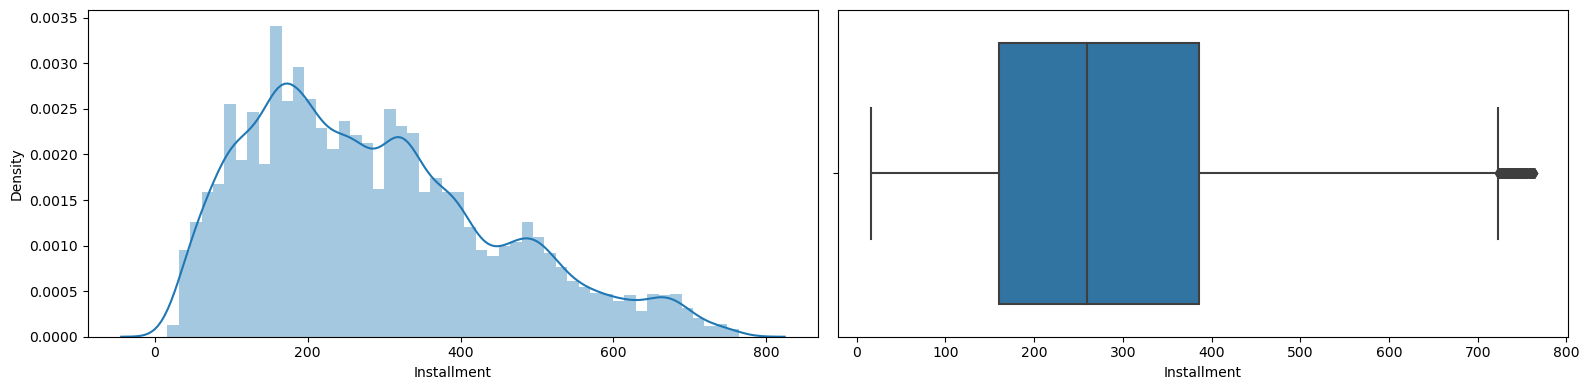

In [167]:
univariate_analysis(loan_df, 'installment')

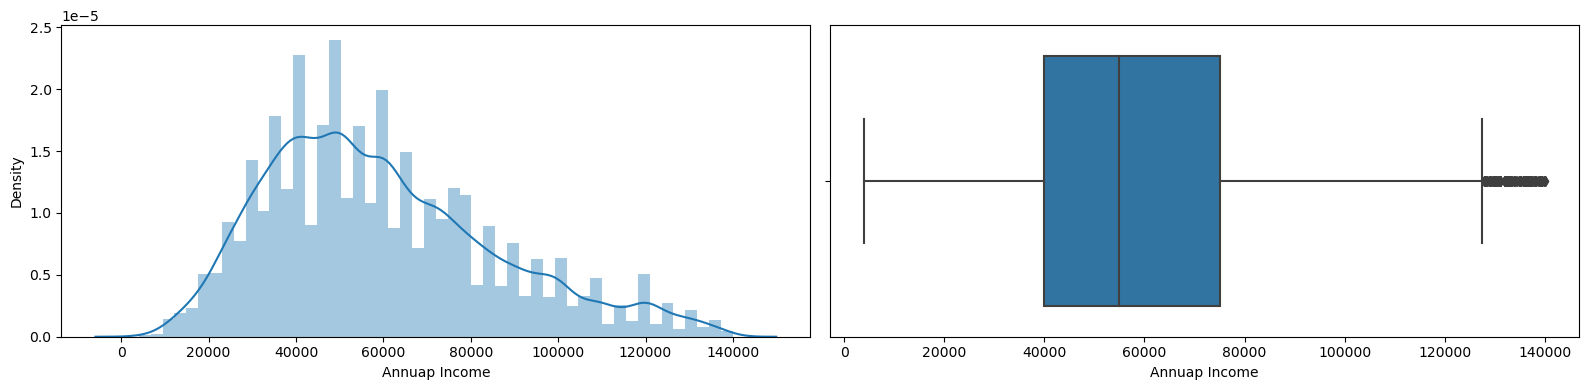

In [168]:
univariate_analysis(loan_df, 'annual_inc')

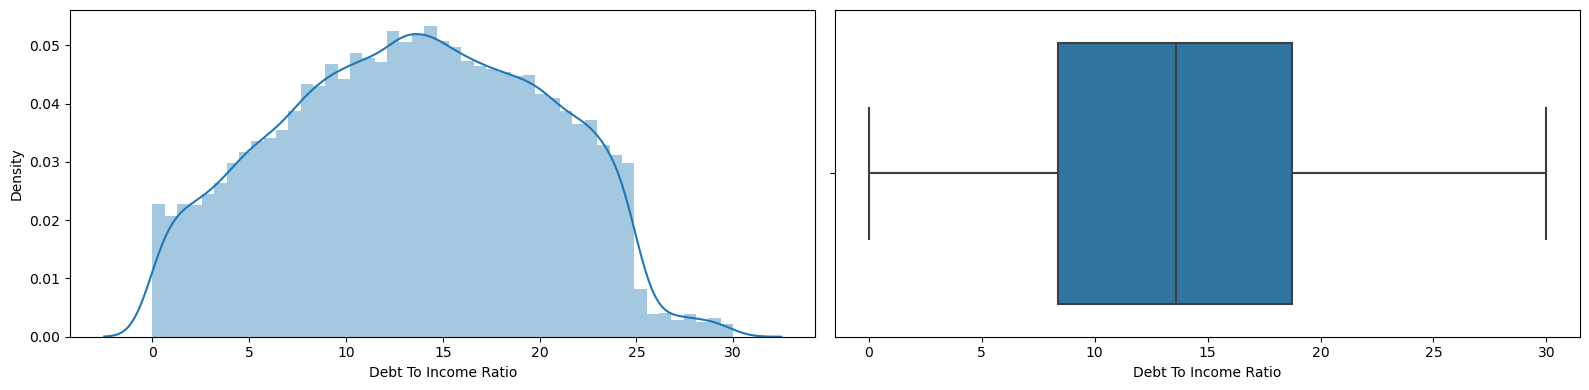

In [169]:
univariate_analysis(loan_df, 'dti')

<Axes: >

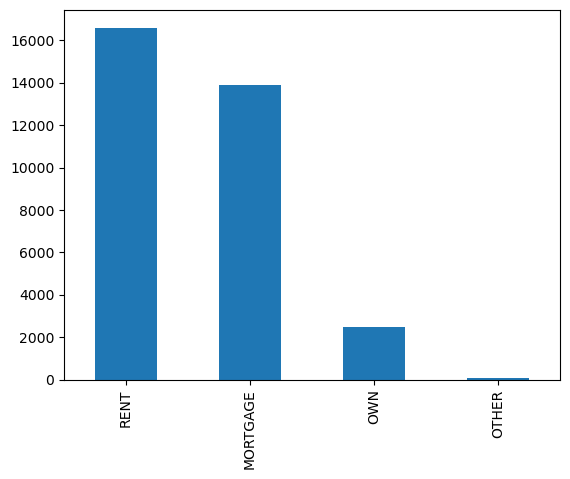

In [170]:
loan_df['home_ownership'].value_counts().plot.bar()

<Axes: >

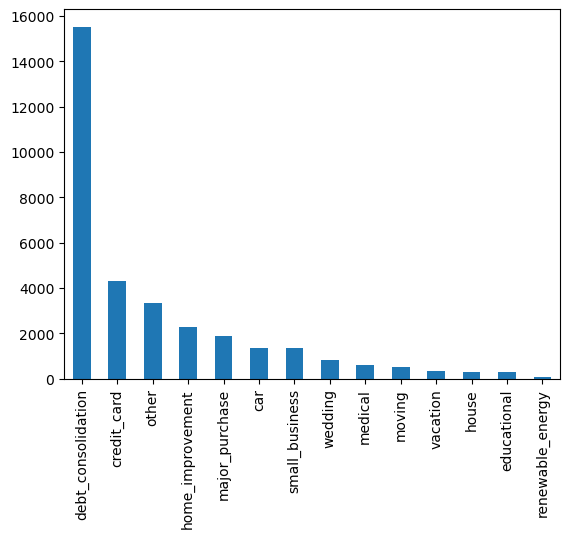

In [171]:
loan_df['purpose'].value_counts().plot.bar()

<Axes: >

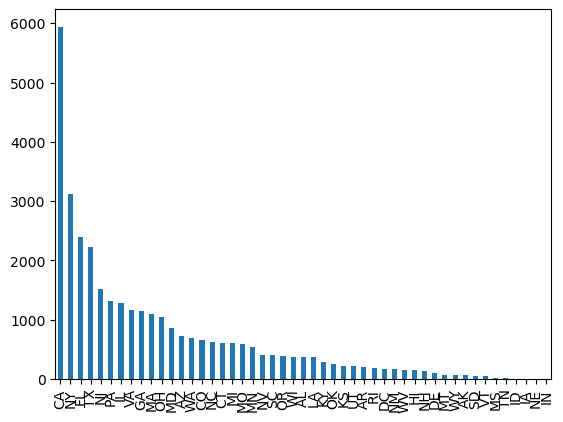

In [172]:
loan_df['addr_state'].value_counts().plot.bar()

<Axes: >

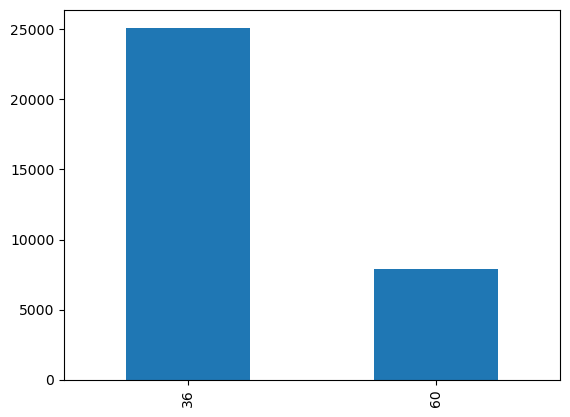

In [173]:
loan_df['term'].value_counts().plot.bar()

<Axes: >

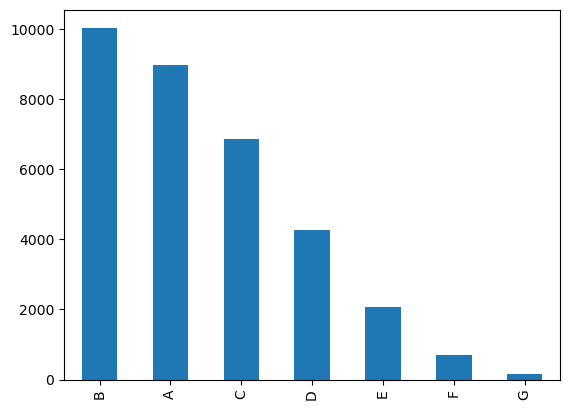

In [174]:
loan_df['grade'].value_counts().plot.bar()

<Axes: >

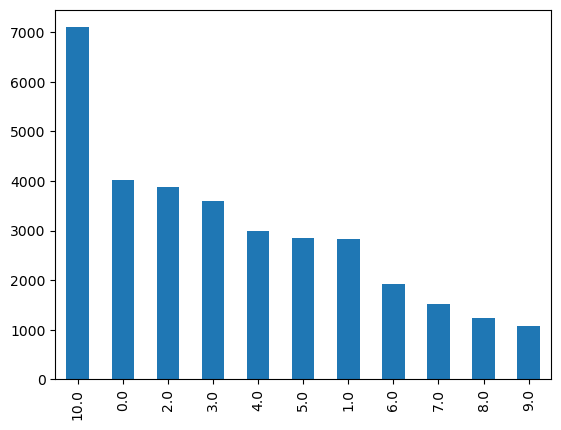

In [175]:
loan_df['emp_length'].value_counts().plot.bar()

<Axes: >

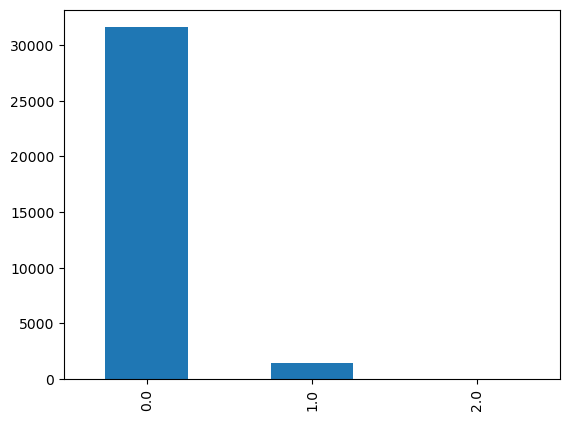

In [176]:
loan_df['pub_rec_bankruptcies'].value_counts().plot.bar()

<Axes: >

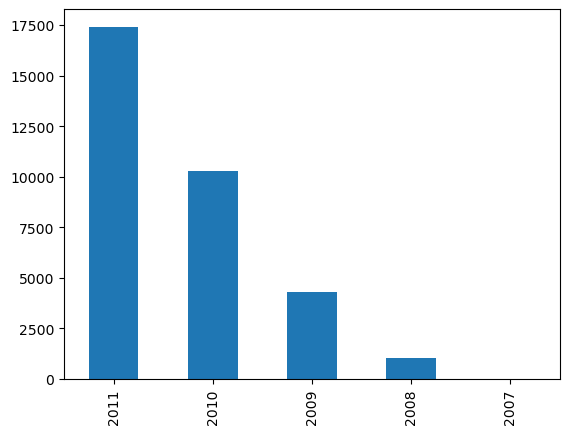

In [177]:
loan_df['issue_y'].value_counts().plot.bar()

<Axes: >

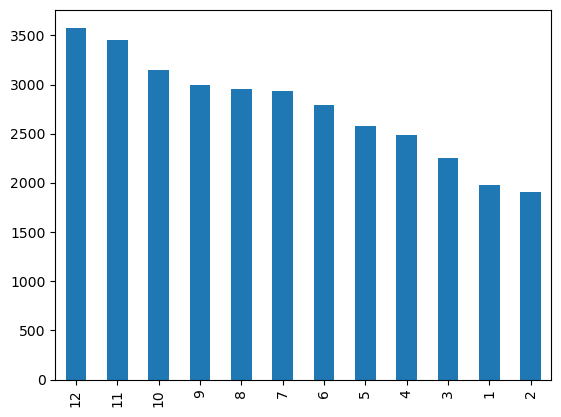

In [178]:
loan_df['issue_m'].value_counts().plot.bar()

<Axes: >

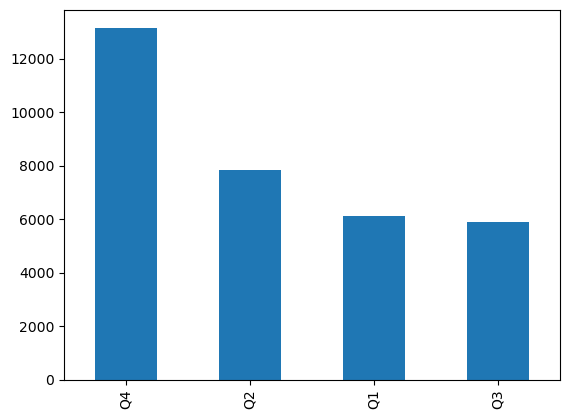

In [179]:
loan_df['issue_q'].value_counts().plot.bar()

<Axes: >

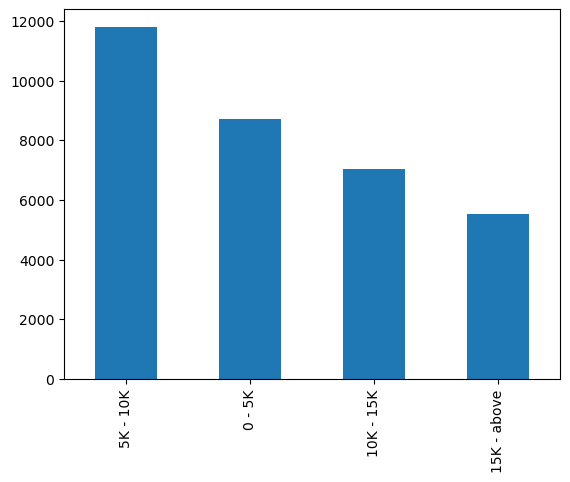

In [180]:
loan_df['loan_amnt_b'].value_counts().plot.bar()

<Axes: >

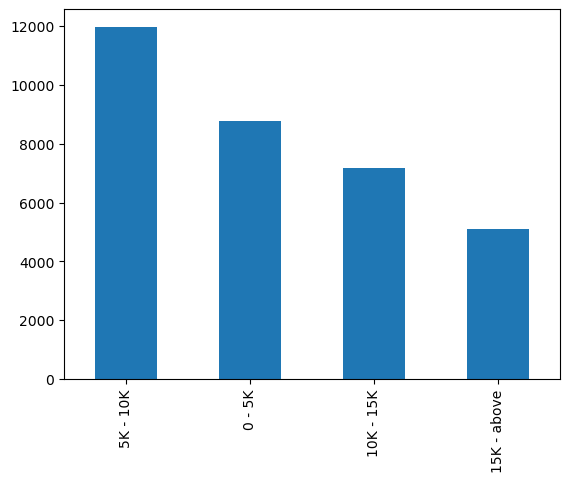

In [181]:
loan_df['funded_amnt_b'].value_counts().plot.bar()

<Axes: >

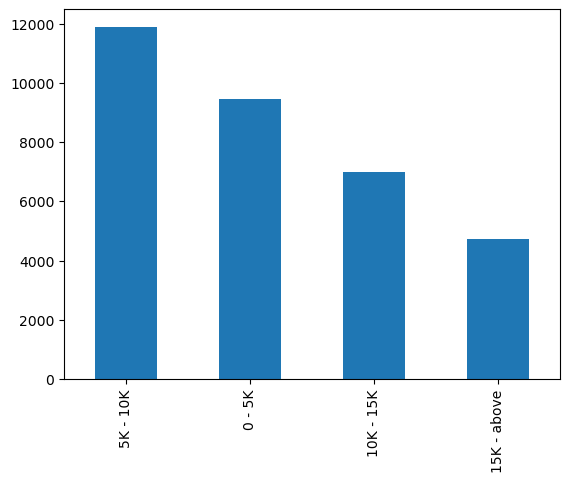

In [182]:
loan_df['funded_amnt_inv_b'].value_counts().plot.bar()

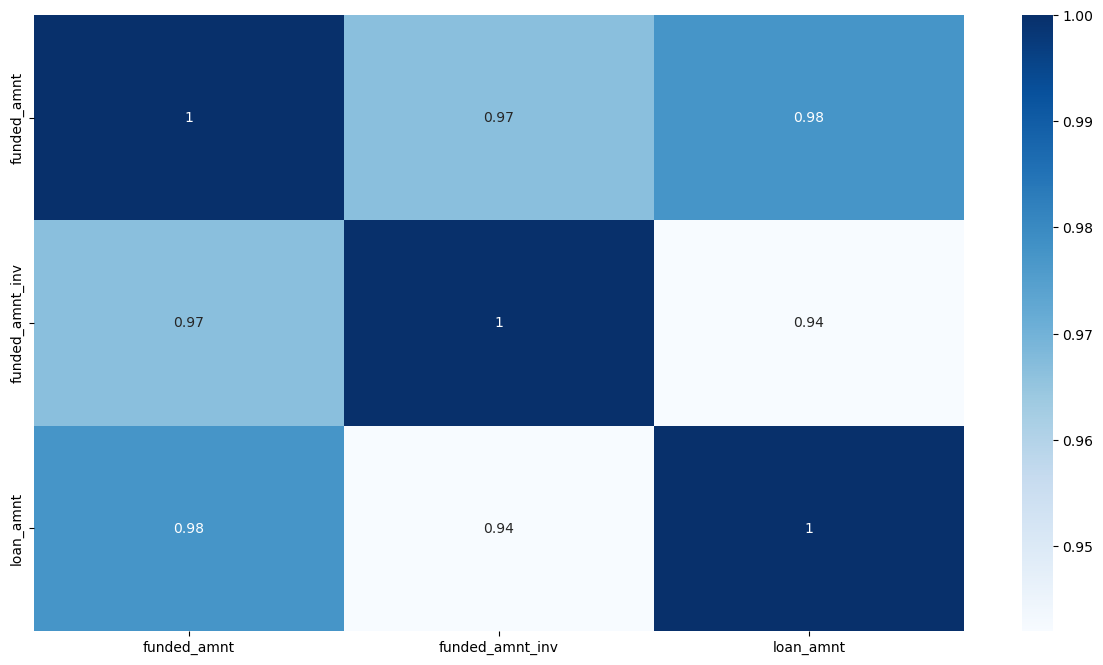

In [183]:
# Identifying correlations
corr = loan_df.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plot.figure(figsize = (15,8))
sea.heatmap(corr, annot = True, cmap='Blues')
plot.show()

In [184]:
loan_df = loan_df.drop(['funded_amnt_inv', 'funded_amnt'],  axis=1)

<Axes: >

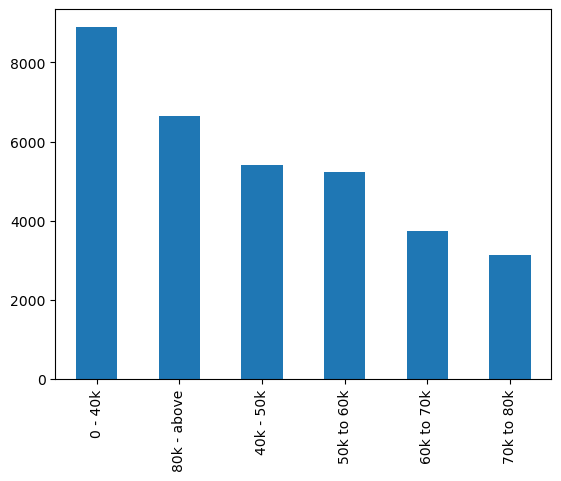

In [185]:
loan_df['annual_inc_b'].value_counts().plot.bar()

<Axes: >

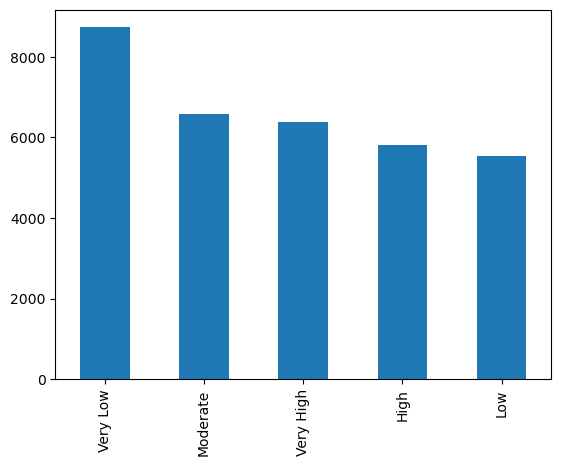

In [186]:
loan_df['int_rate_b'].value_counts().plot.bar()

<Axes: >

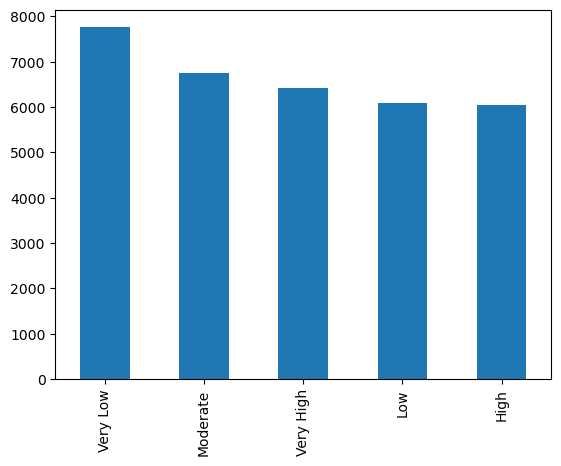

In [187]:
loan_df['dti_b'].value_counts().plot.bar()

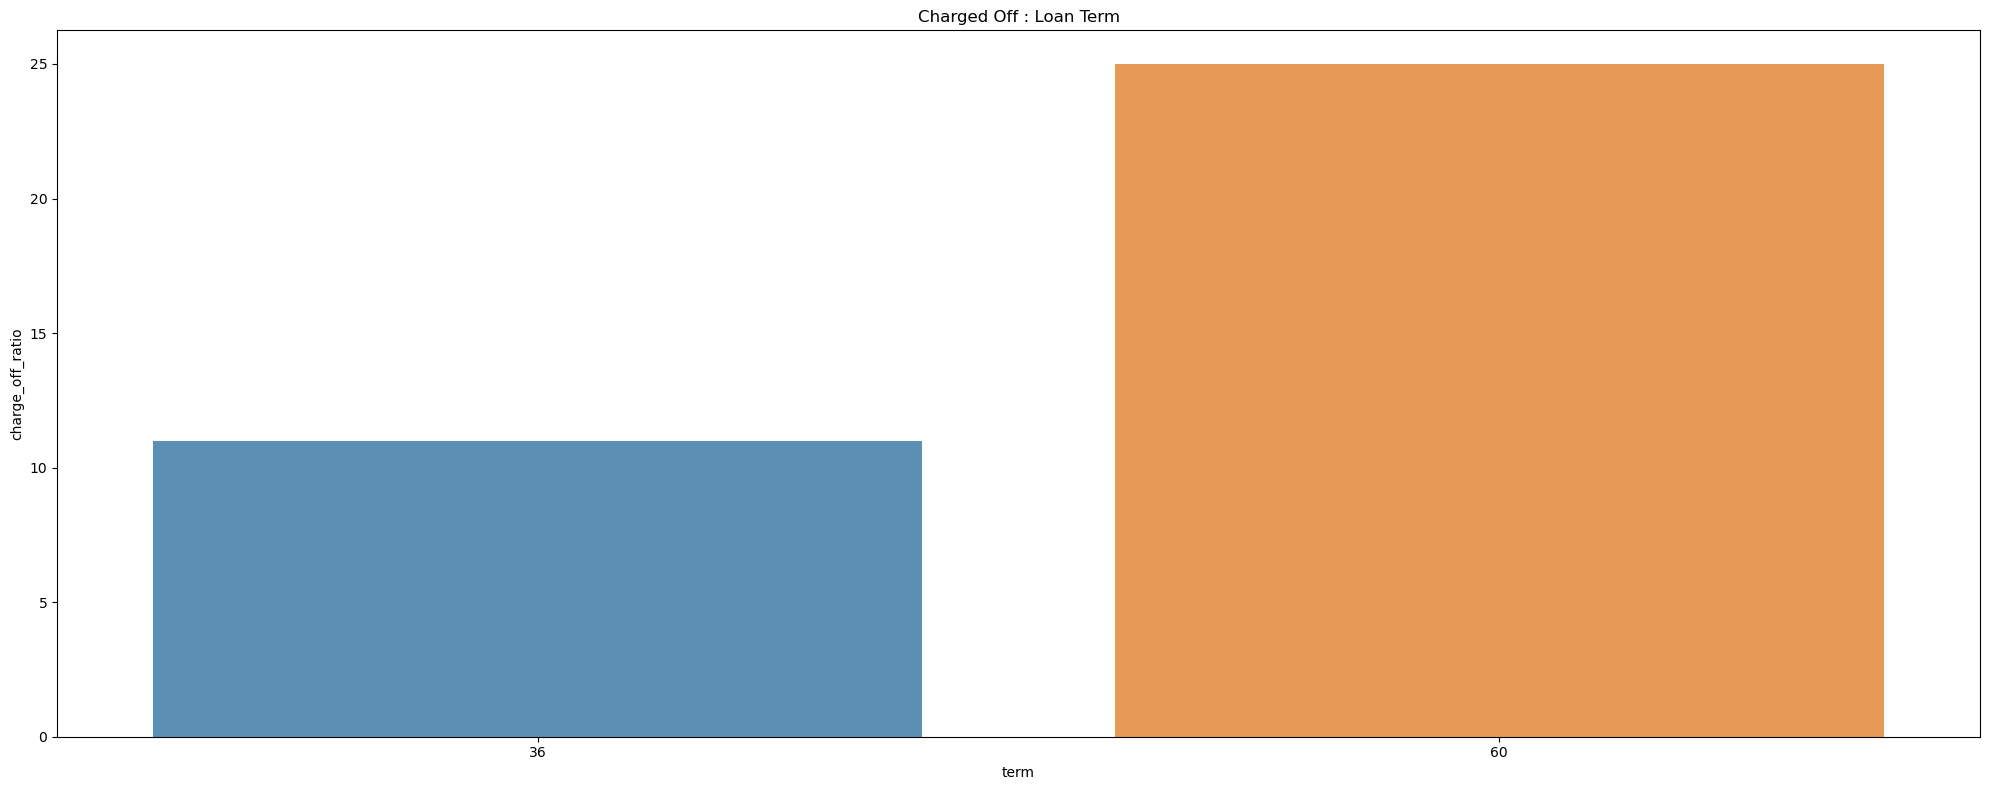

loan_status,term,Charged Off,Fully Paid,total,charge_off_ratio
0,36,2710,22429,25139,11.0
1,60,1990,5927,7917,25.0


In [211]:
# The Charge Offs ratio within the category
ratio_wise_plot(loan_df, 'term')

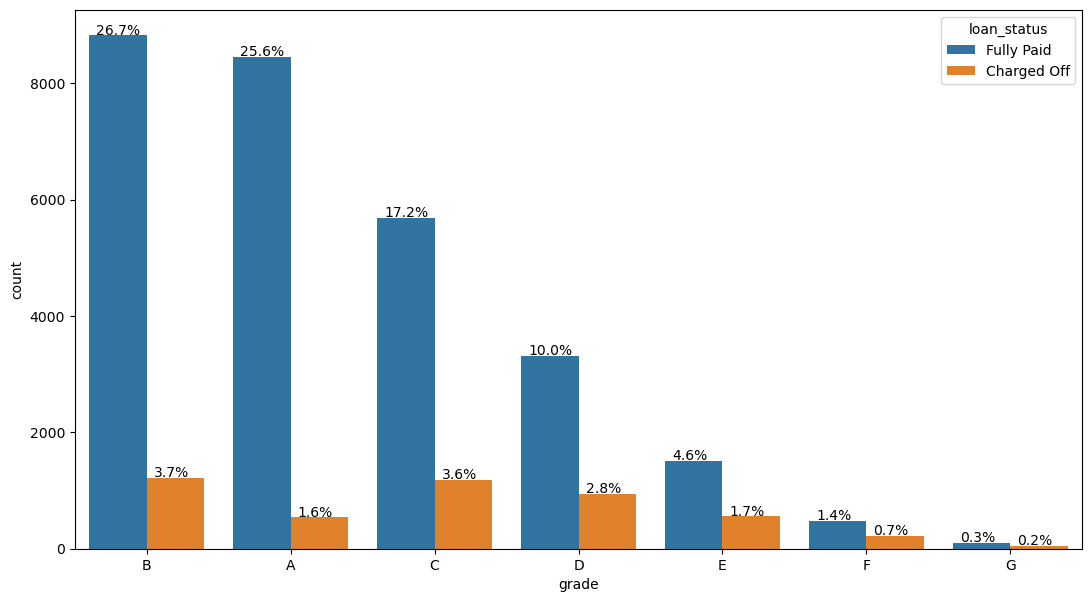

In [213]:
# Overall Charge Offs ratio
series_plot(loan_df, 'grade', 'loan_status')

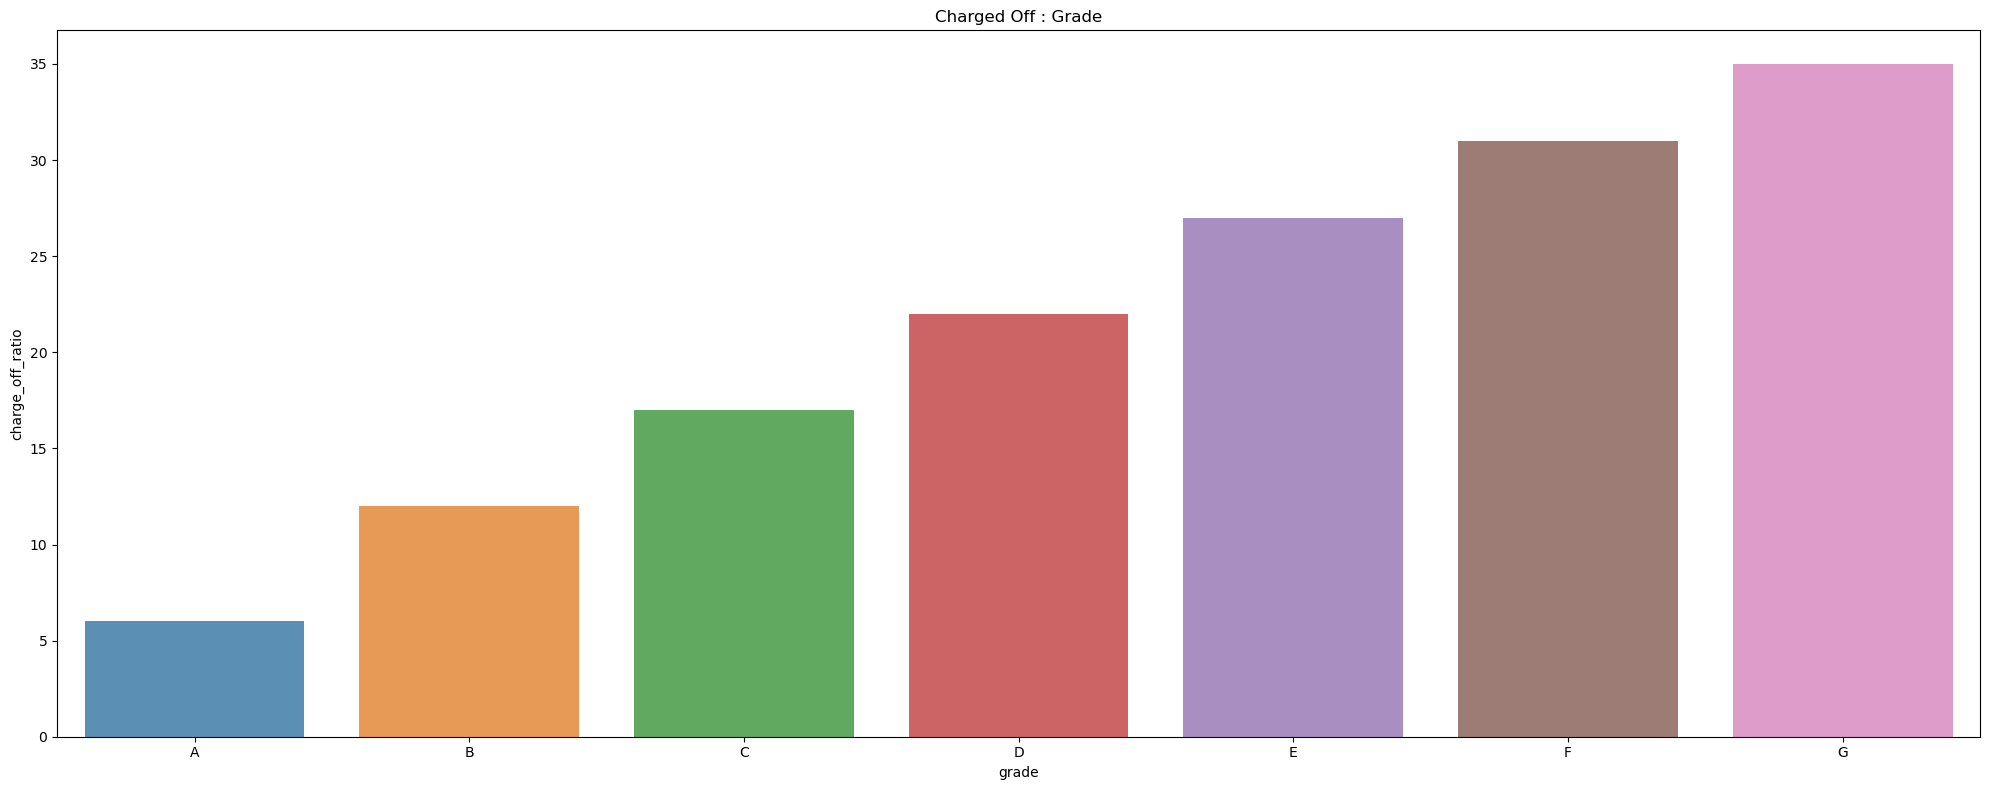

loan_status,grade,Charged Off,Fully Paid,total,charge_off_ratio
0,A,537,8451,8988,6.0
1,B,1222,8821,10043,12.0
2,C,1175,5683,6858,17.0
3,D,937,3316,4253,22.0
4,E,555,1505,2060,27.0
5,F,219,477,696,31.0
6,G,55,103,158,35.0


In [215]:
# The Charge Off ratios within the category total
ratio_wise_plot(loan_df, 'grade')

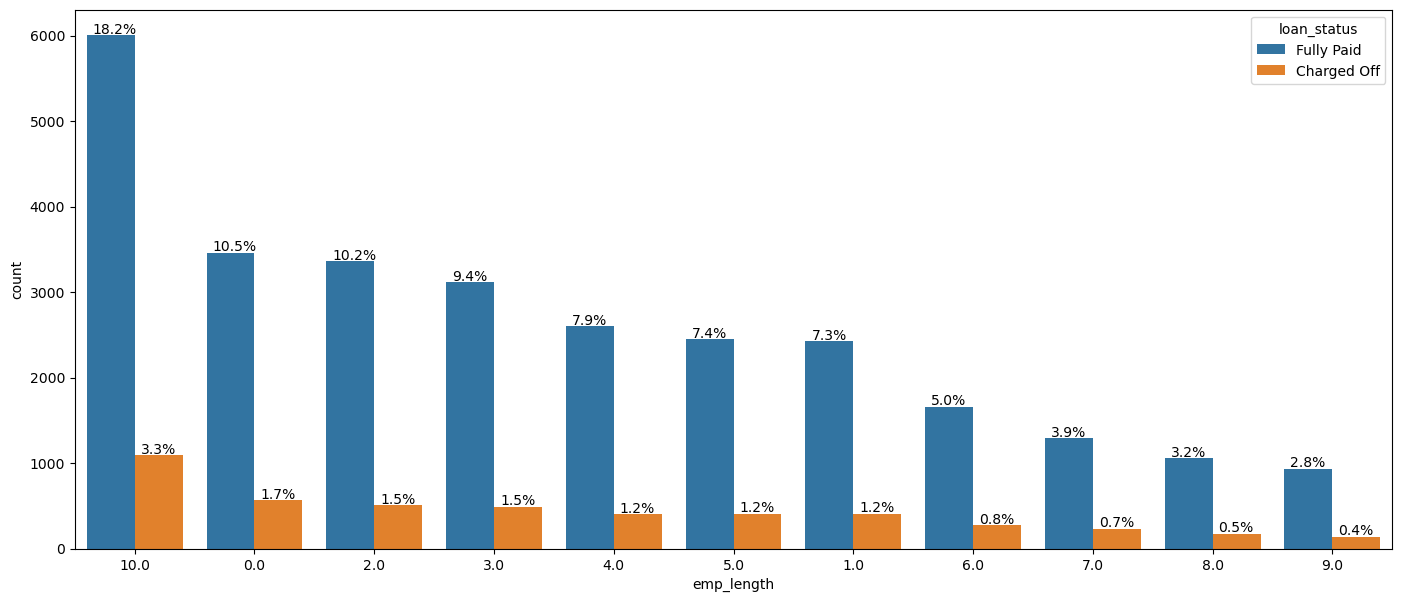

In [217]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'emp_length', 'loan_status')

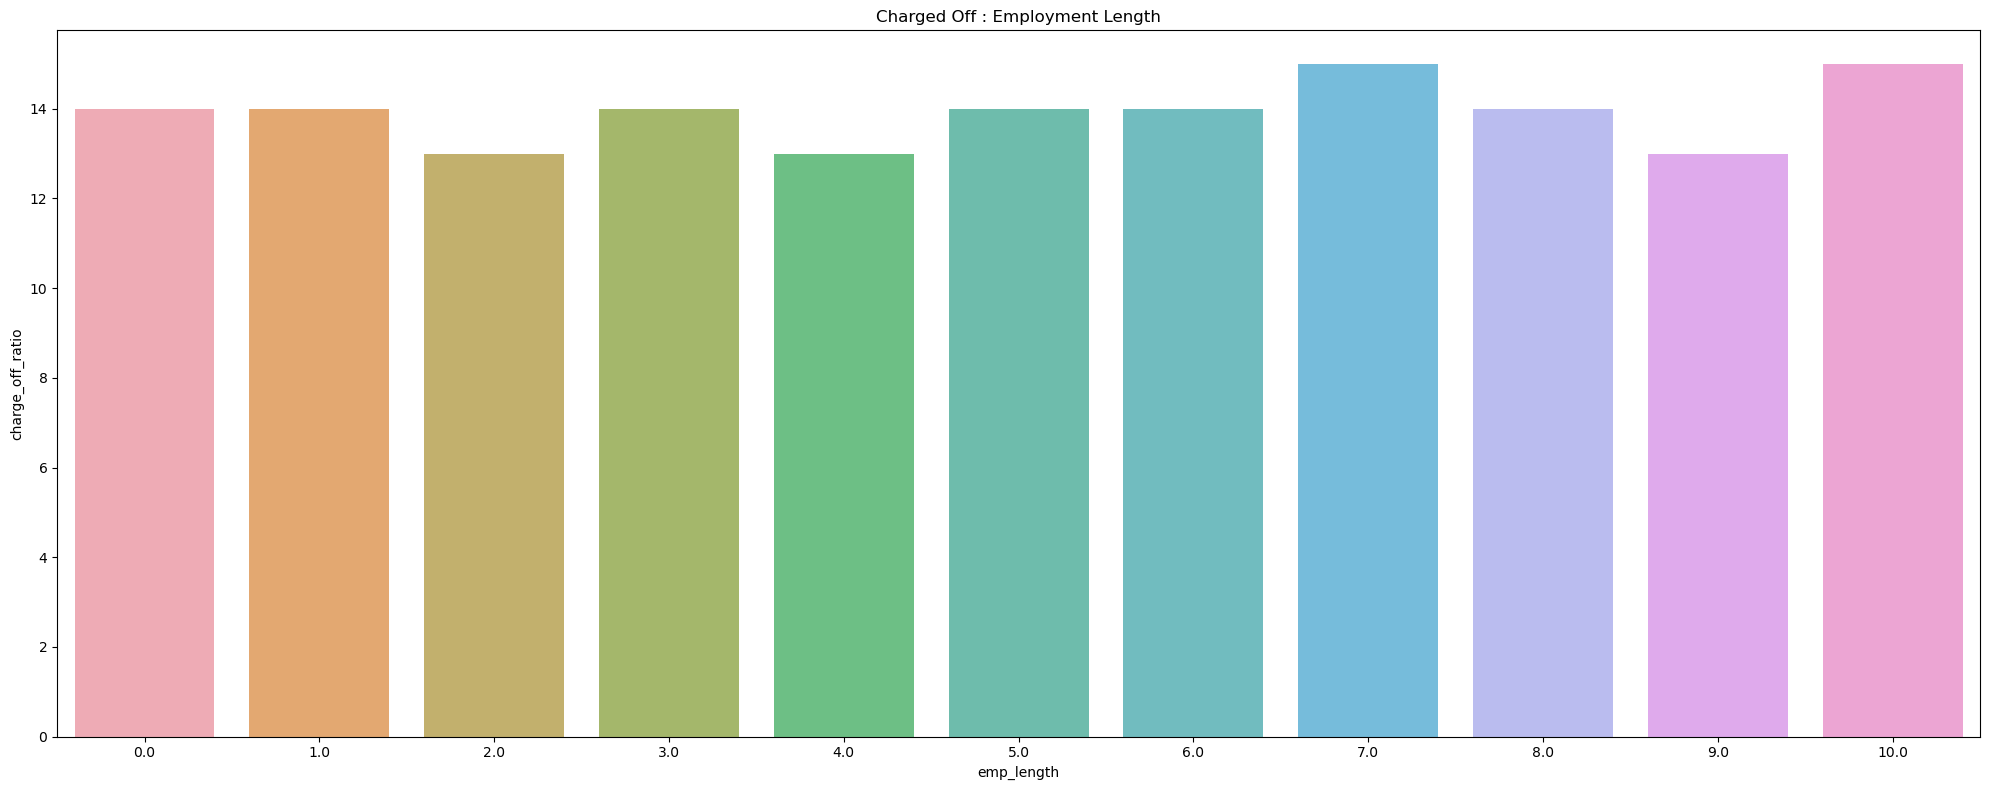

loan_status,emp_length,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,565,3461,4026,14.0
1,1.0,408,2427,2835,14.0
2,2.0,509,3360,3869,13.0
3,3.0,491,3113,3604,14.0
4,4.0,401,2598,2999,13.0
5,5.0,408,2449,2857,14.0
6,6.0,272,1659,1931,14.0
7,7.0,233,1294,1527,15.0
8,8.0,176,1056,1232,14.0
9,9.0,141,936,1077,13.0


In [219]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'emp_length')

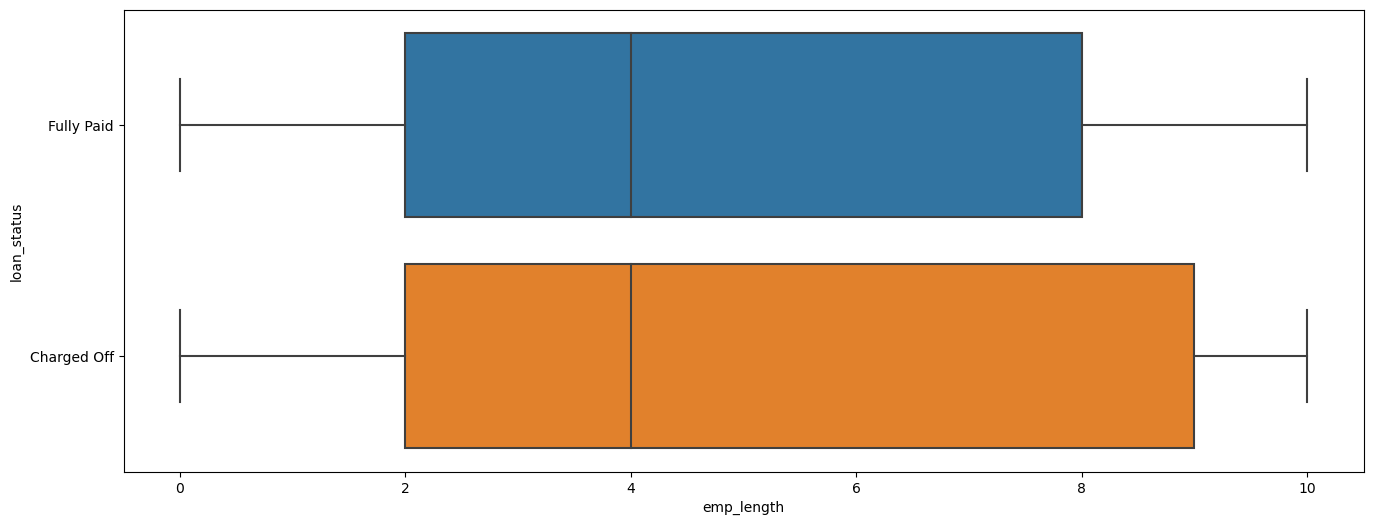

In [221]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_status,x=loan_df.emp_length)
plot.show()

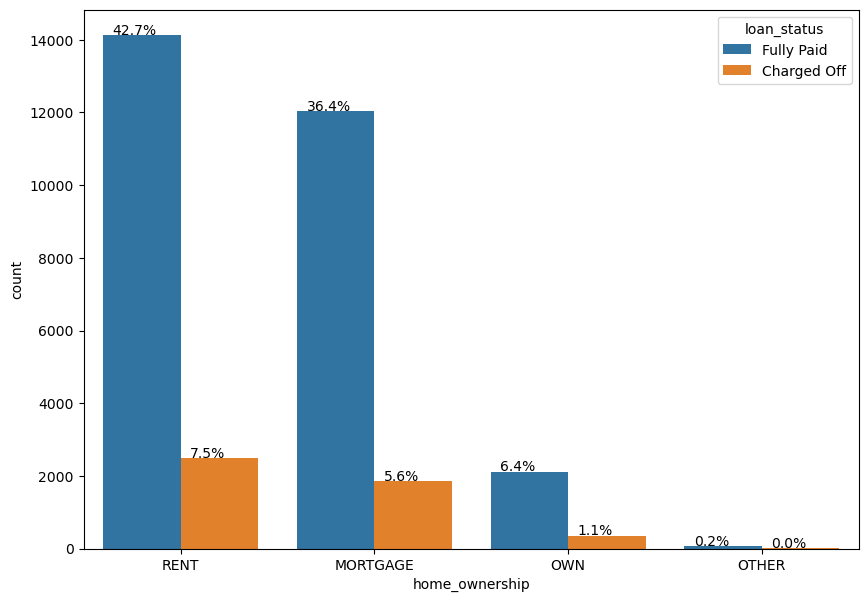

In [223]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'home_ownership', 'loan_status')

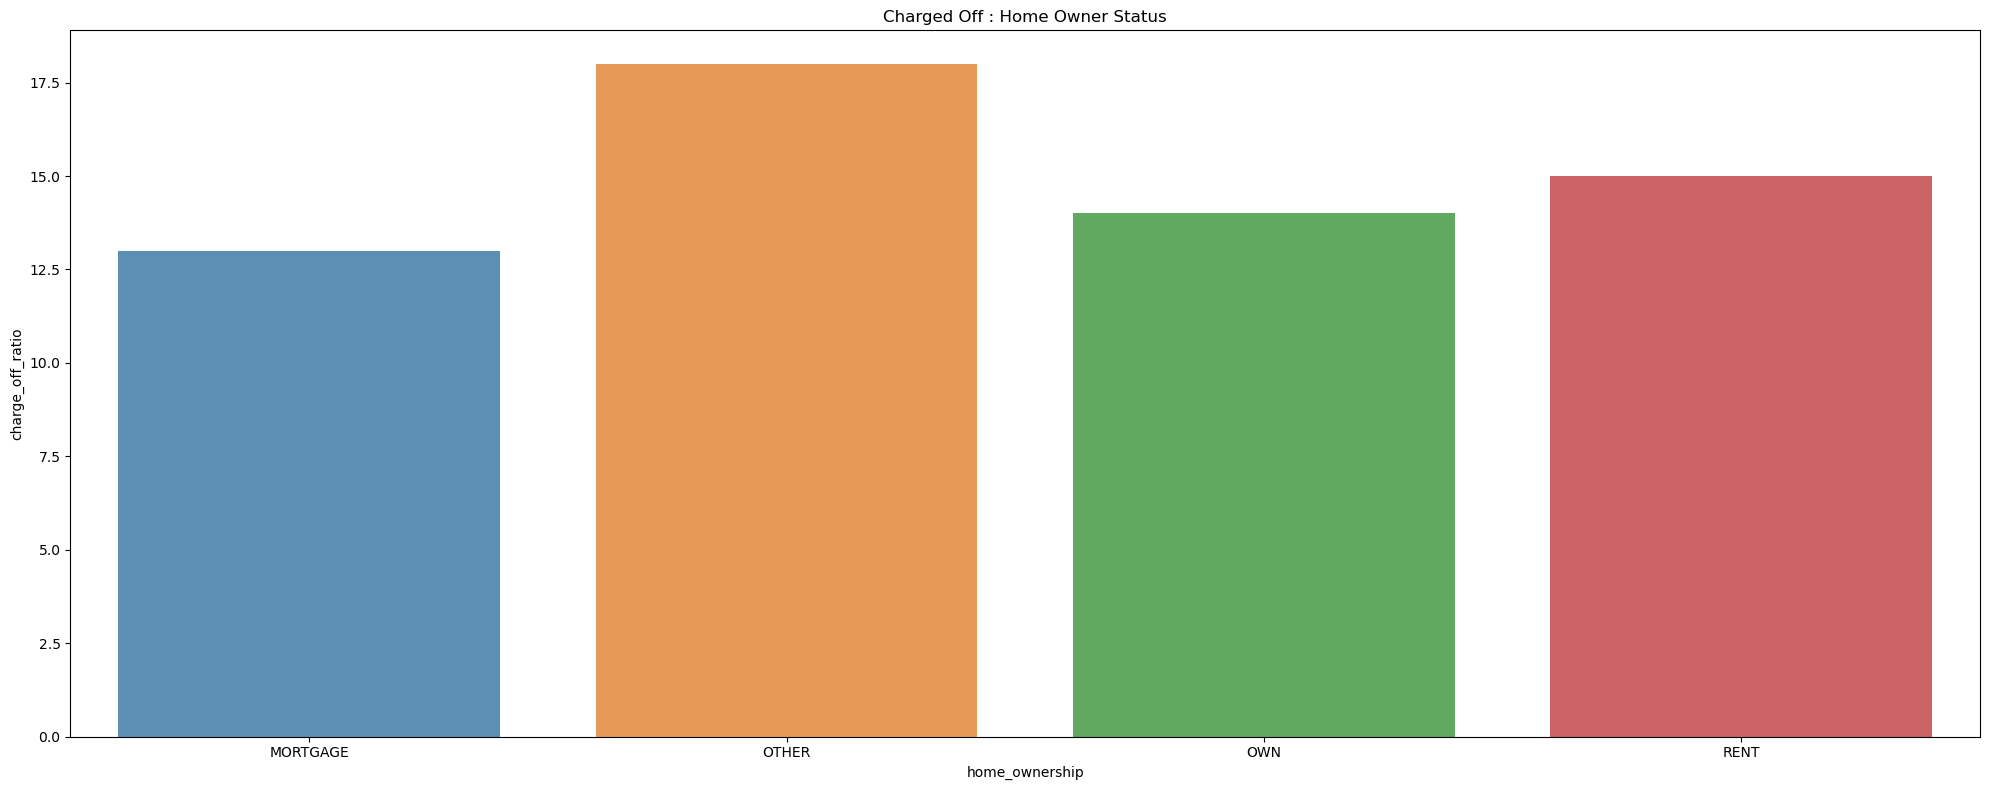

loan_status,home_ownership,Charged Off,Fully Paid,total,charge_off_ratio
0,MORTGAGE,1846,12045,13891,13.0
1,OTHER,16,73,89,18.0
2,OWN,354,2113,2467,14.0
3,RENT,2484,14125,16609,15.0


In [224]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'home_ownership')

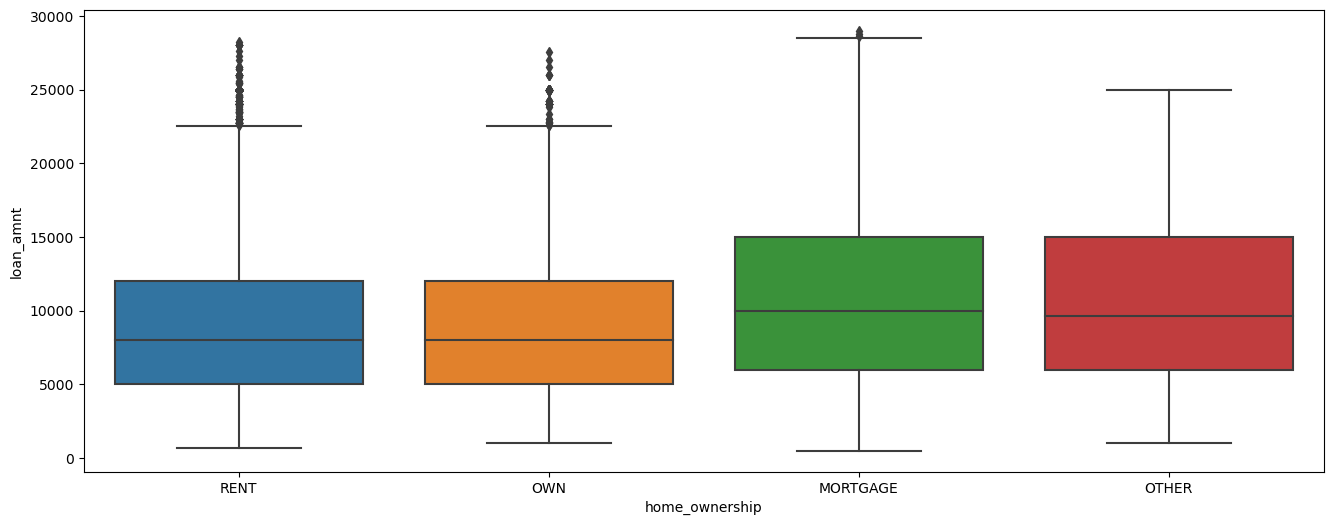

In [225]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.home_ownership)
plot.show()

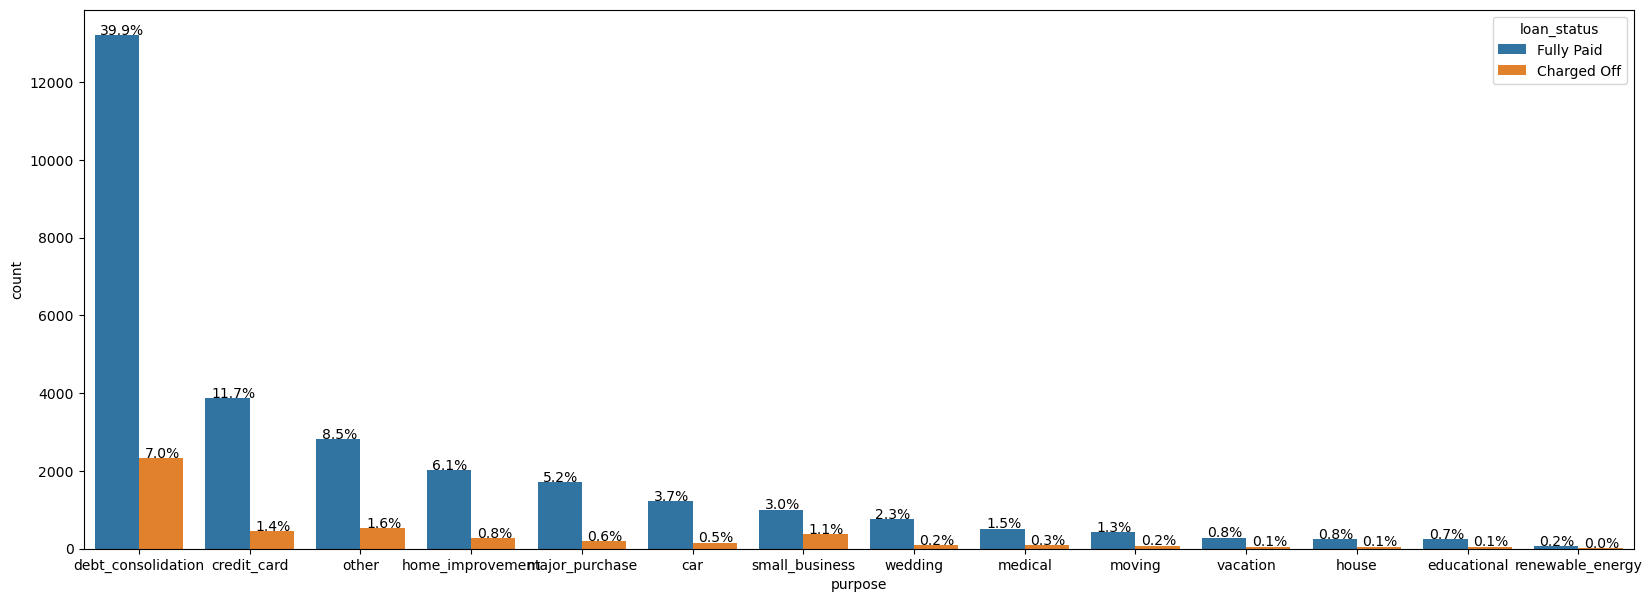

In [226]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'purpose', 'loan_status')

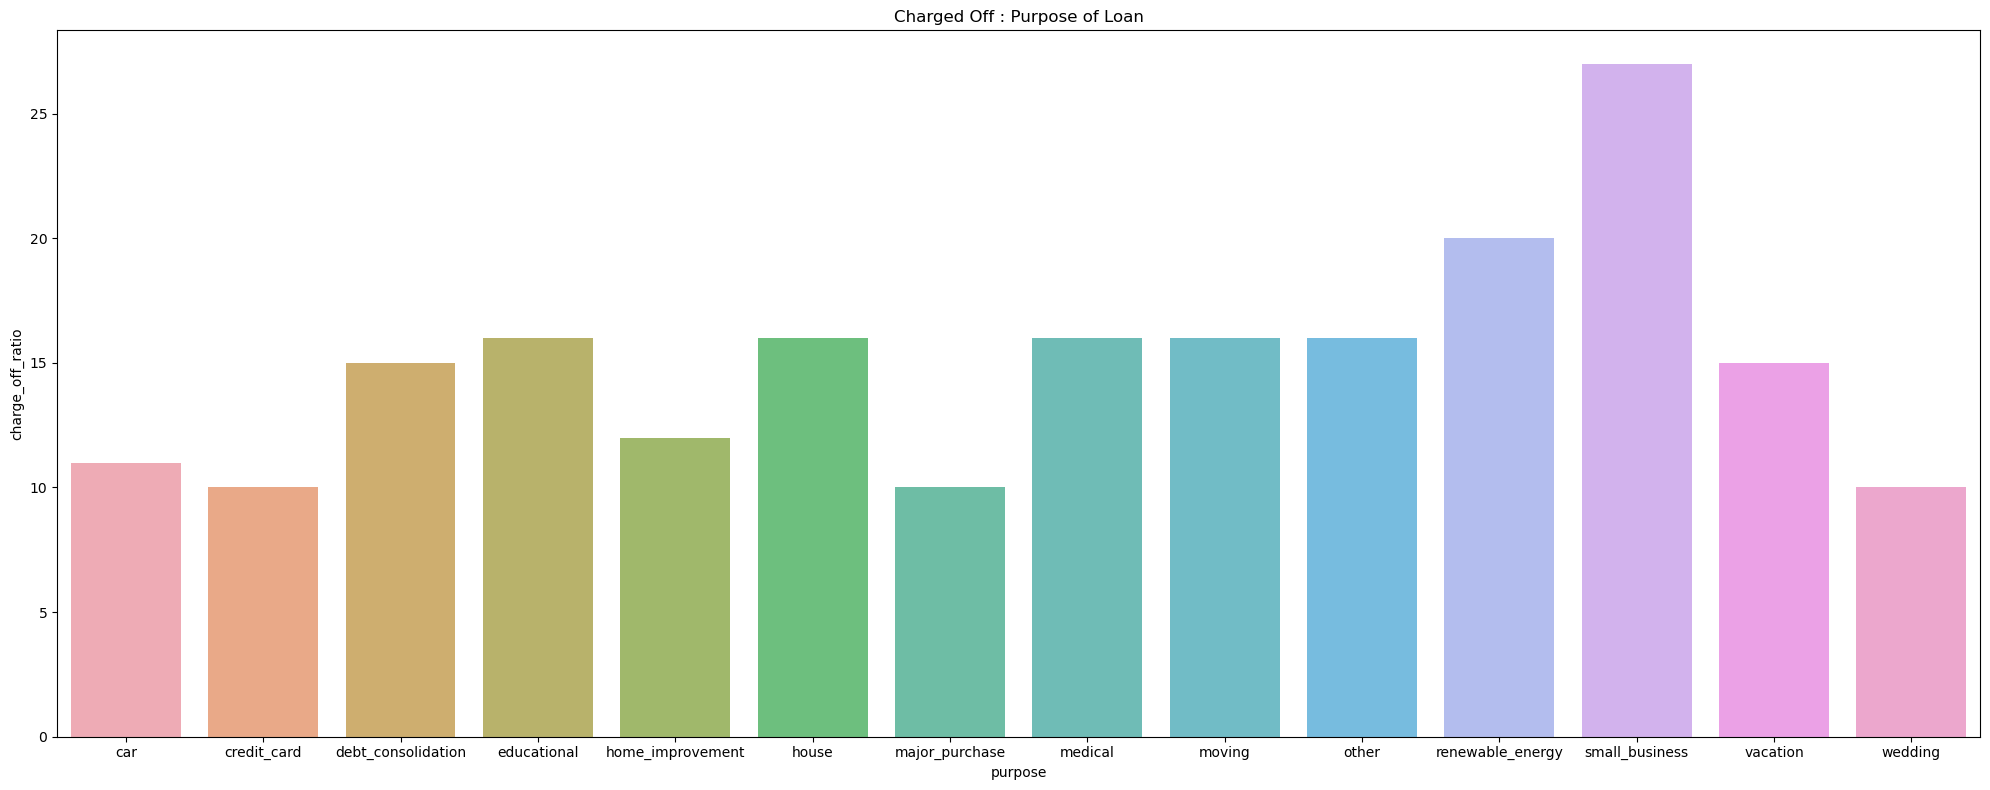

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,150,1221,1371,11.0
1,credit_card,448,3868,4316,10.0
2,debt_consolidation,2325,13203,15528,15.0
3,educational,46,235,281,16.0
4,home_improvement,274,2014,2288,12.0
5,house,48,248,296,16.0
6,major_purchase,194,1710,1904,10.0
7,medical,95,509,604,16.0
8,moving,79,428,507,16.0
9,other,531,2818,3349,16.0


In [227]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'purpose')

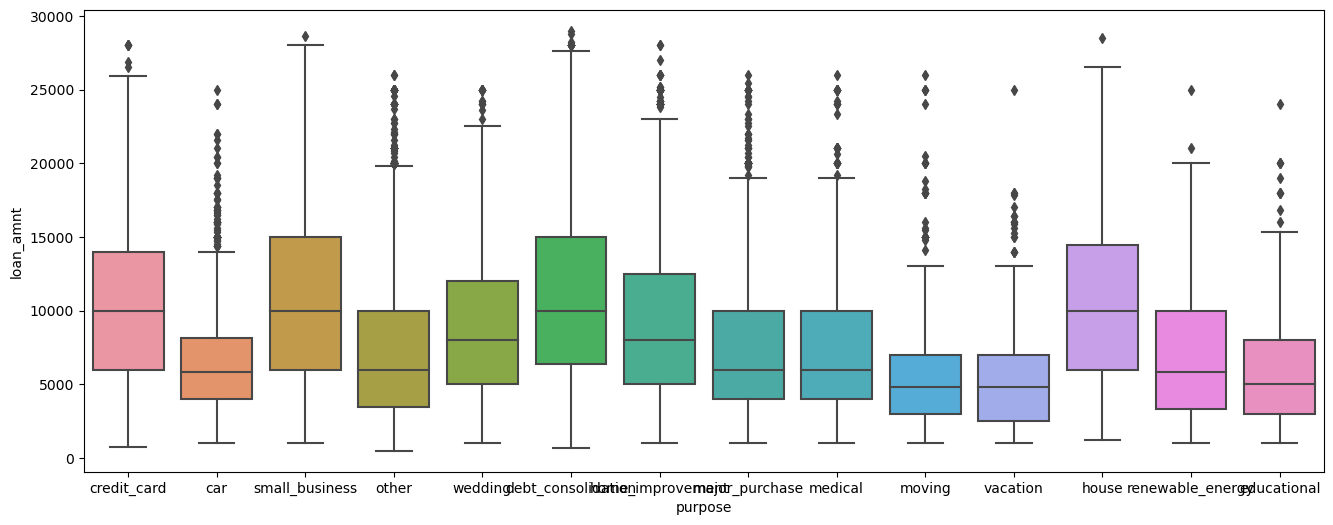

In [228]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.purpose)
plot.show()

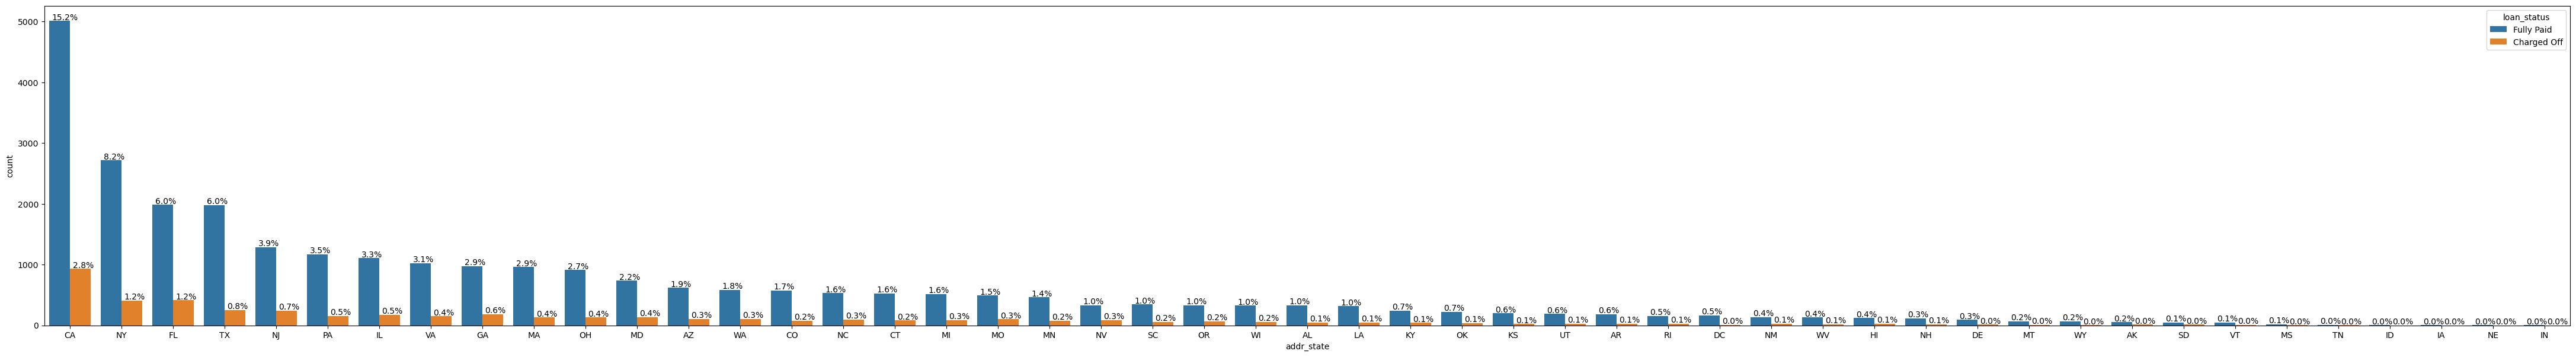

In [229]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'addr_state', 'loan_status')

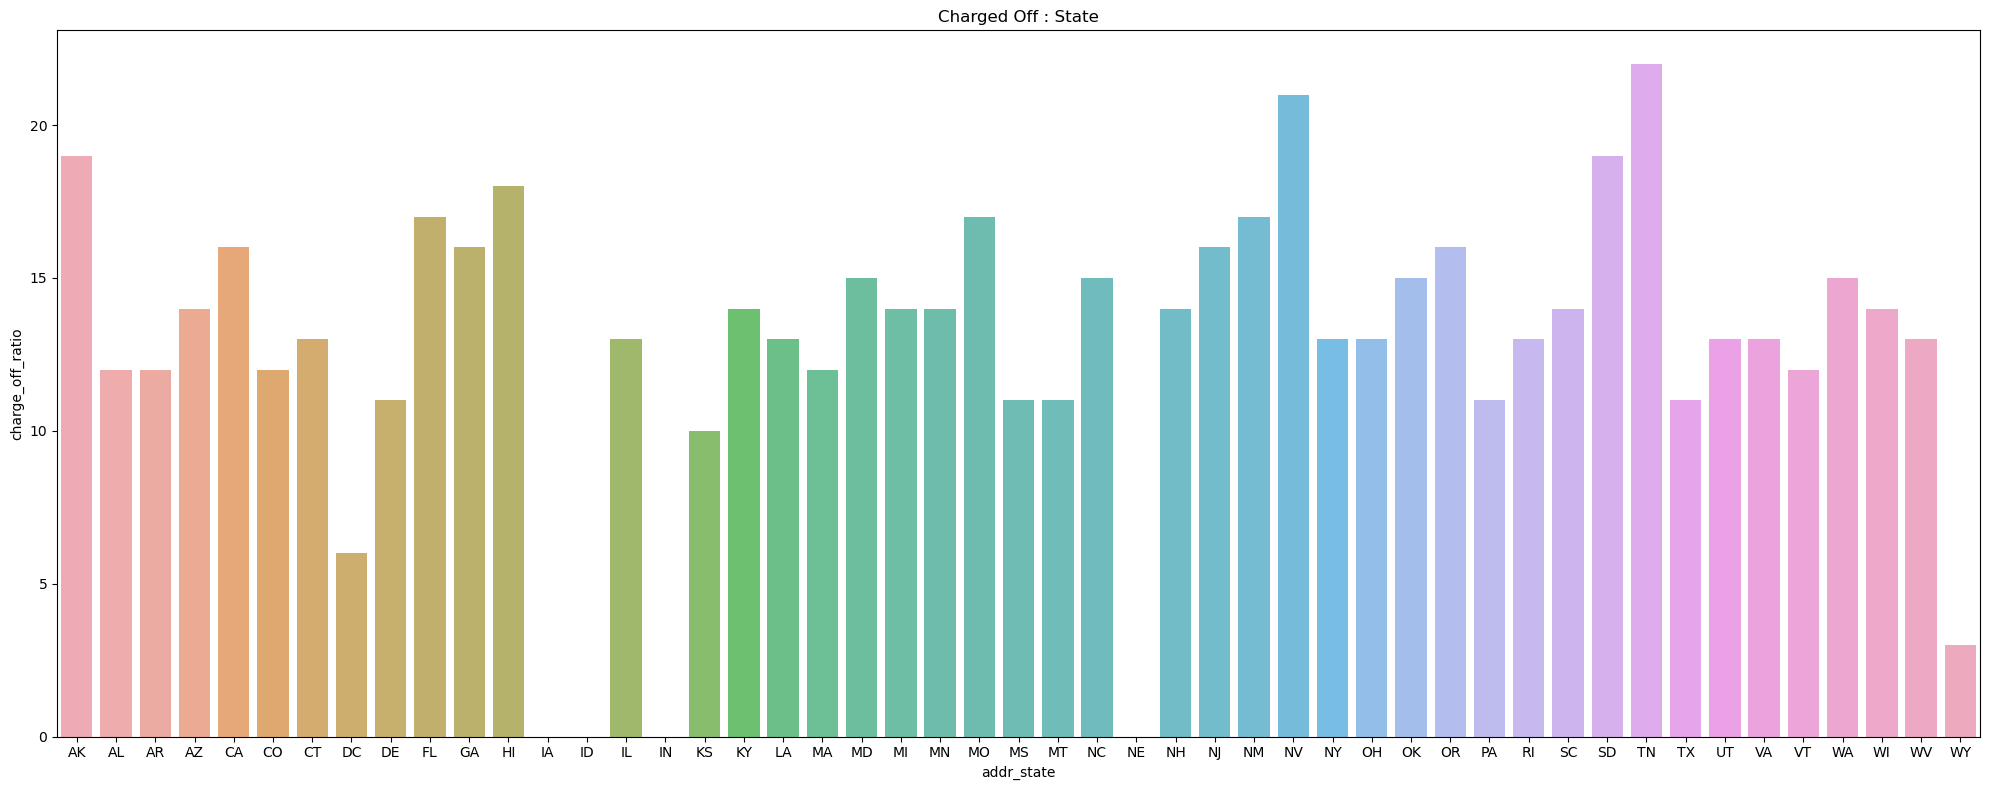

loan_status,addr_state,Charged Off,Fully Paid,total,charge_off_ratio
0,AK,12.0,51.0,63.0,19.0
1,AL,45.0,330.0,375.0,12.0
2,AR,25.0,183.0,208.0,12.0
3,AZ,103.0,618.0,721.0,14.0
4,CA,930.0,5009.0,5939.0,16.0
5,CO,77.0,576.0,653.0,12.0
6,CT,80.0,526.0,606.0,13.0
7,DC,10.0,162.0,172.0,6.0
8,DE,11.0,90.0,101.0,11.0
9,FL,413.0,1984.0,2397.0,17.0


In [230]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'addr_state')

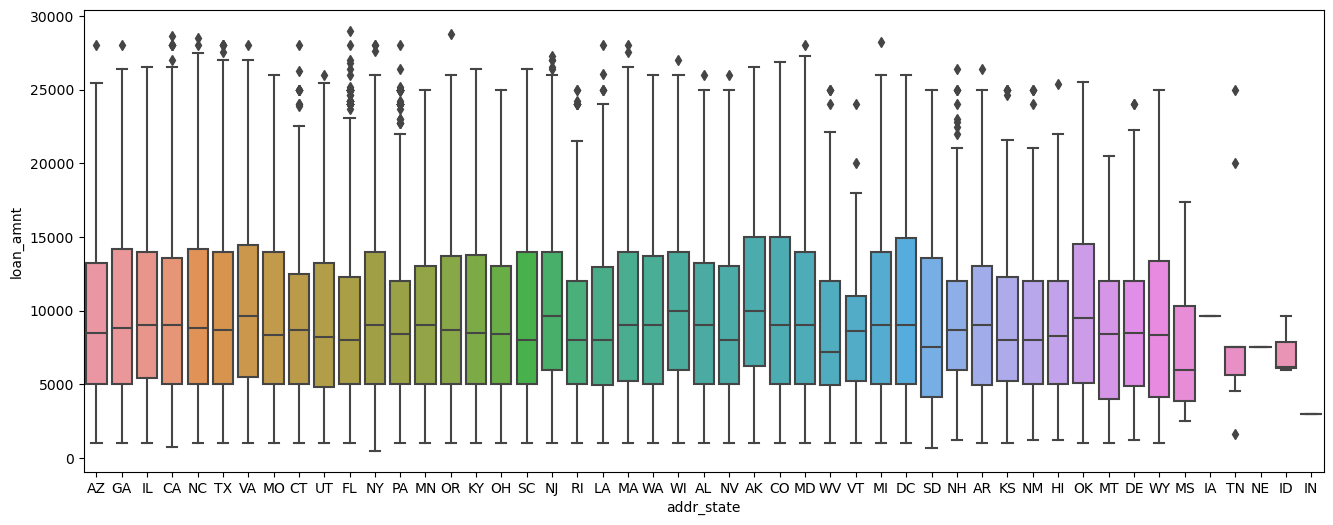

In [231]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.addr_state)
plot.show()

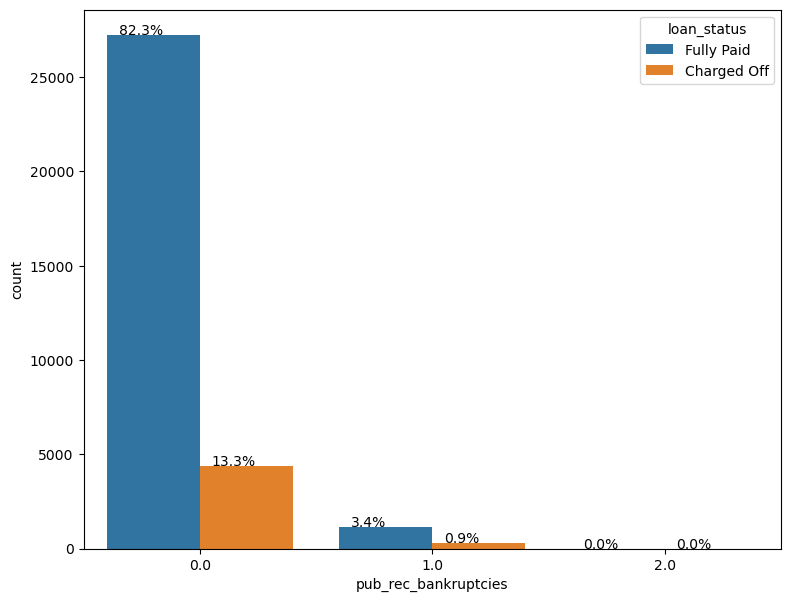

In [232]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'pub_rec_bankruptcies', 'loan_status')

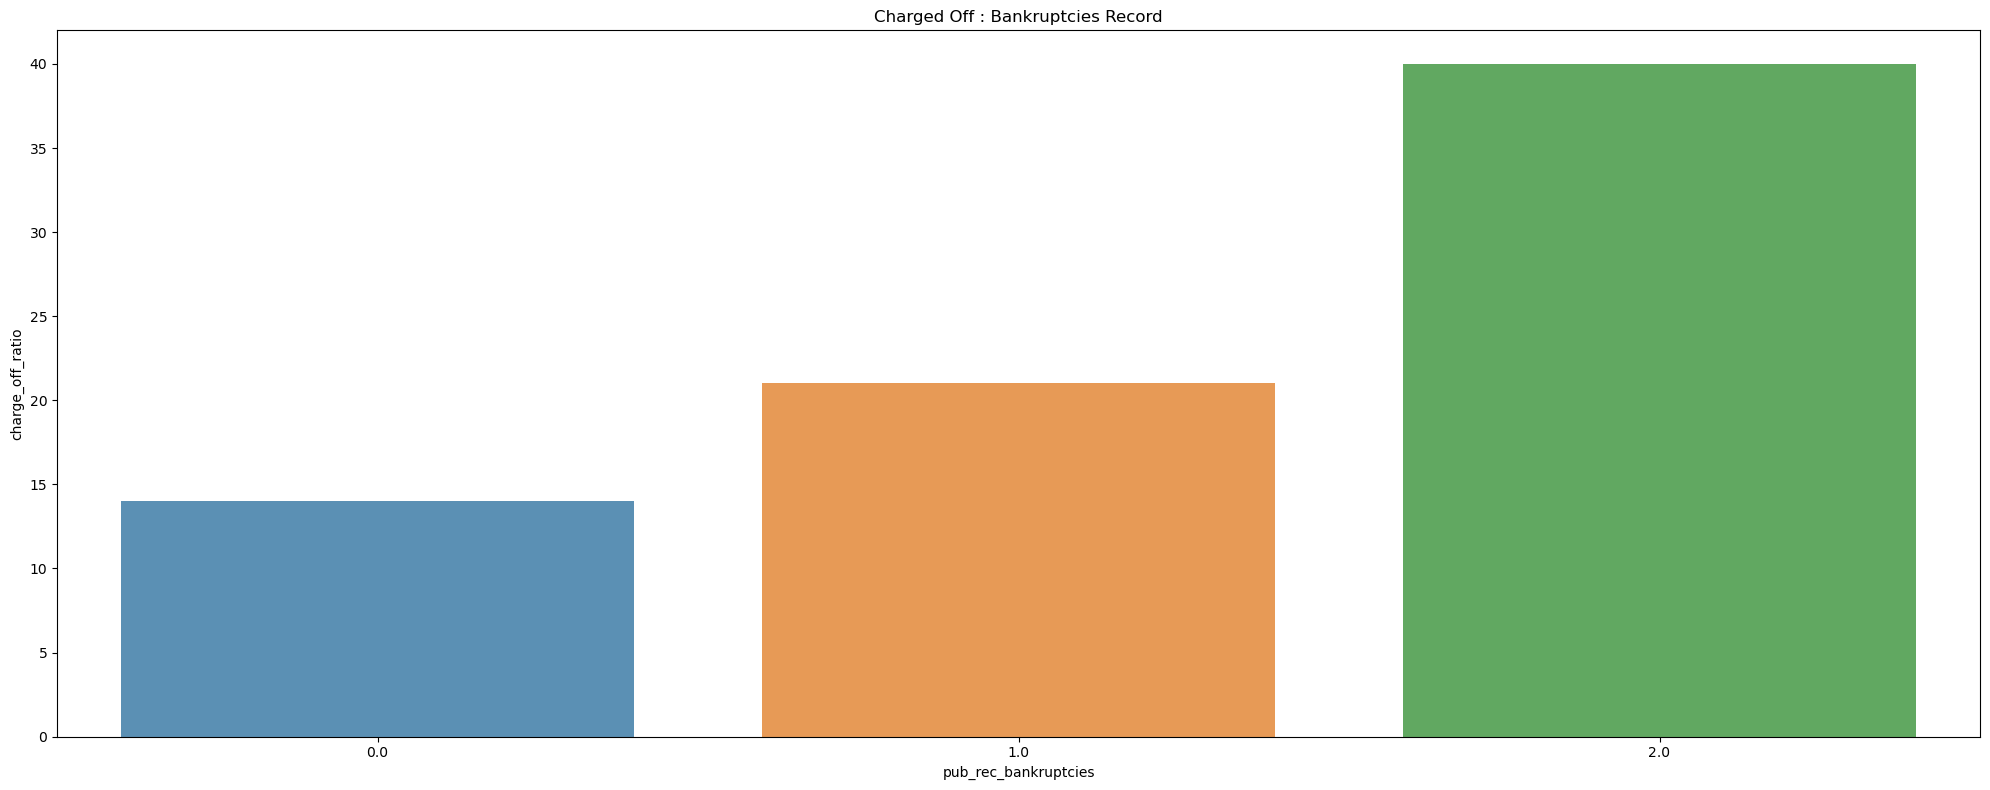

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,4390,27216,31606,14.0
1,1.0,308,1137,1445,21.0
2,2.0,2,3,5,40.0


In [233]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'pub_rec_bankruptcies')

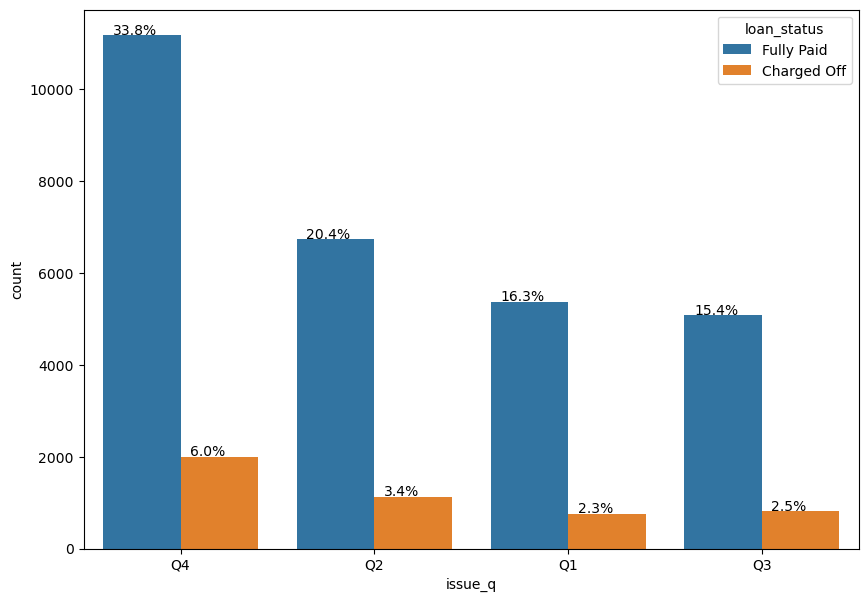

In [234]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'issue_q', 'loan_status')

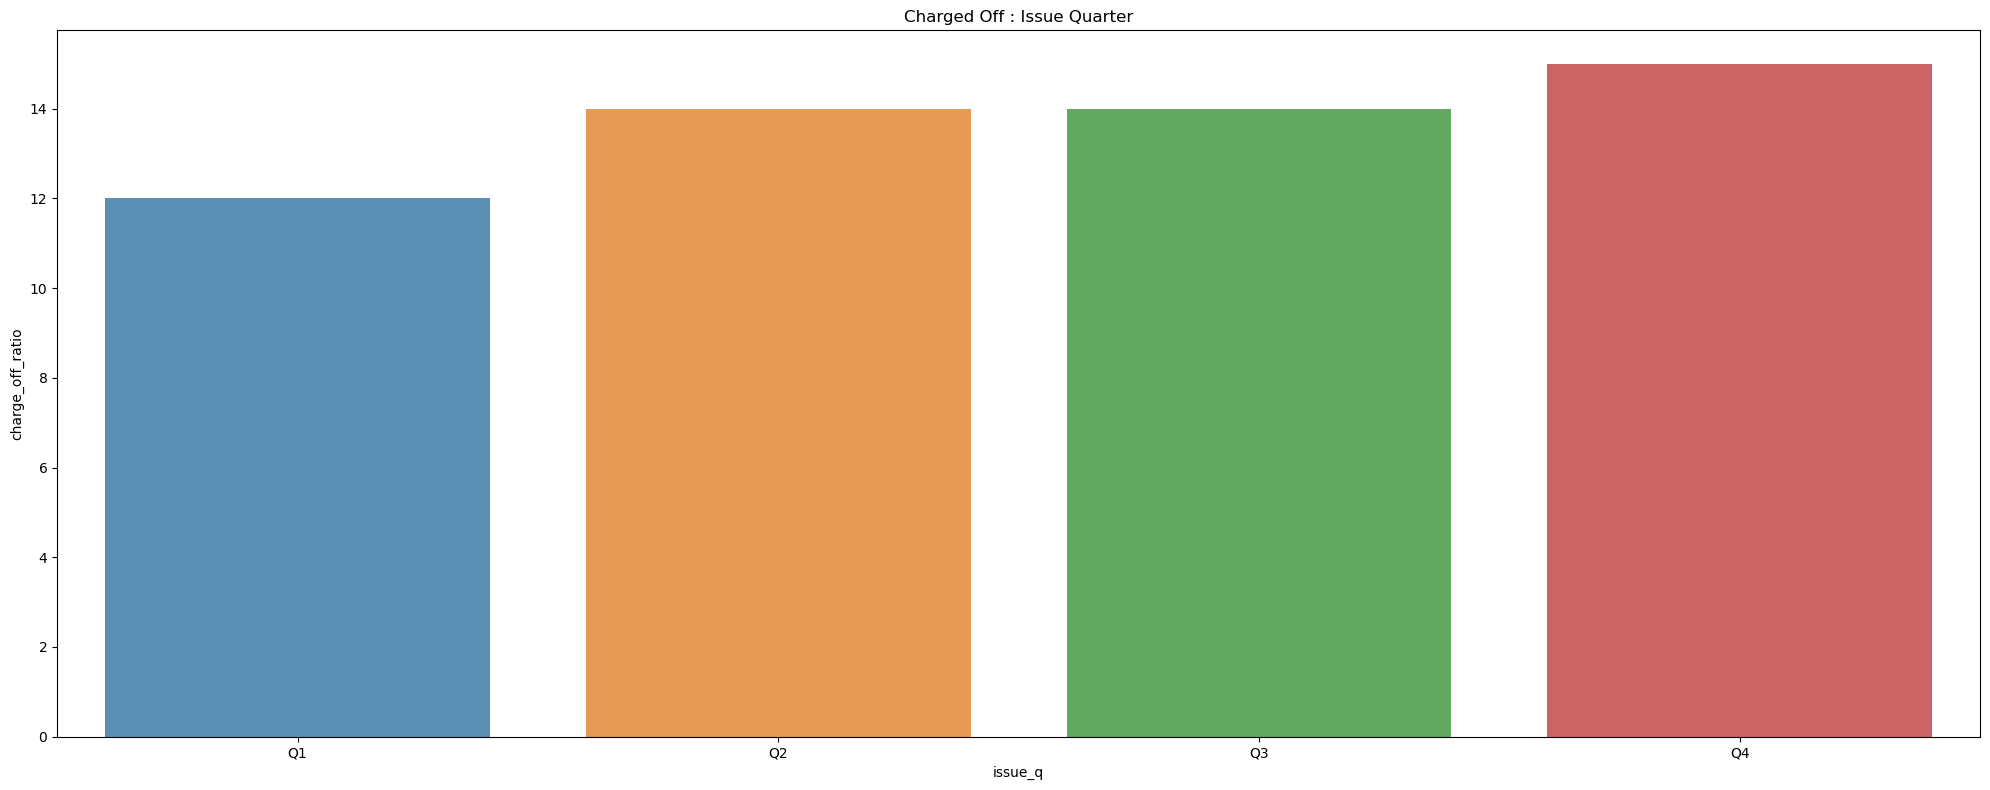

loan_status,issue_q,Charged Off,Fully Paid,total,charge_off_ratio
0,Q1,761,5376,6137,12.0
1,Q2,1124,6728,7852,14.0
2,Q3,818,5078,5896,14.0
3,Q4,1997,11174,13171,15.0


In [235]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'issue_q')

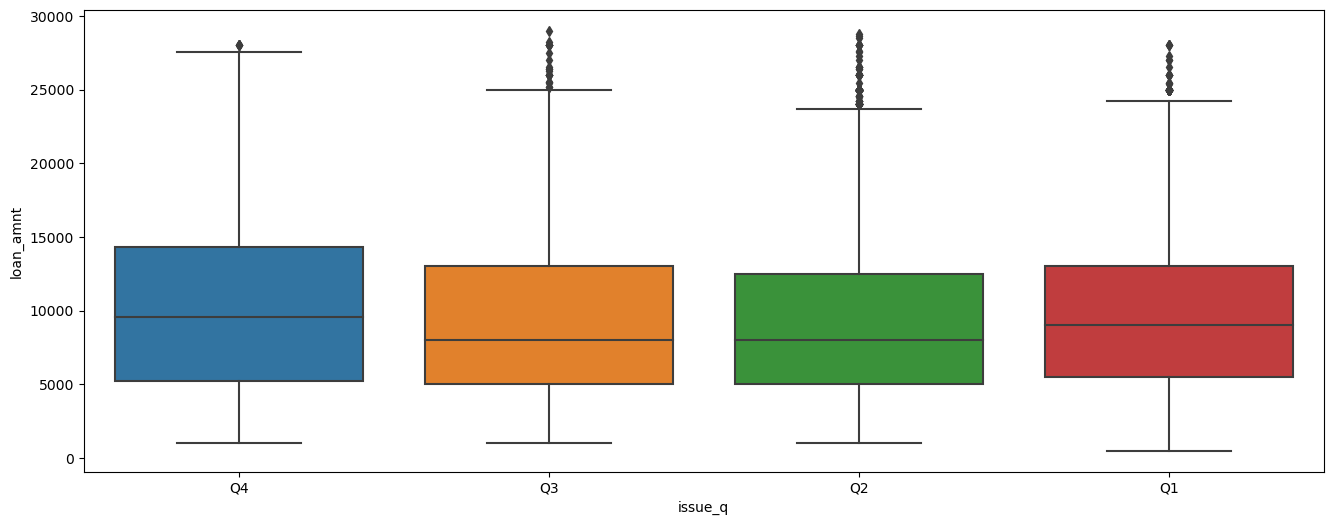

In [236]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.issue_q)
plot.show()

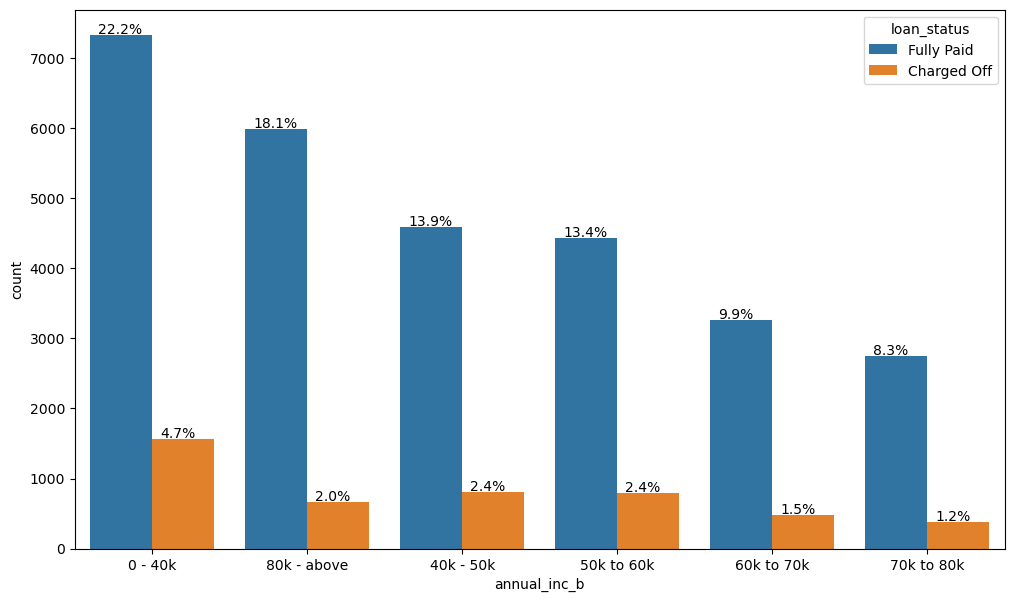

In [237]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'annual_inc_b', 'loan_status')

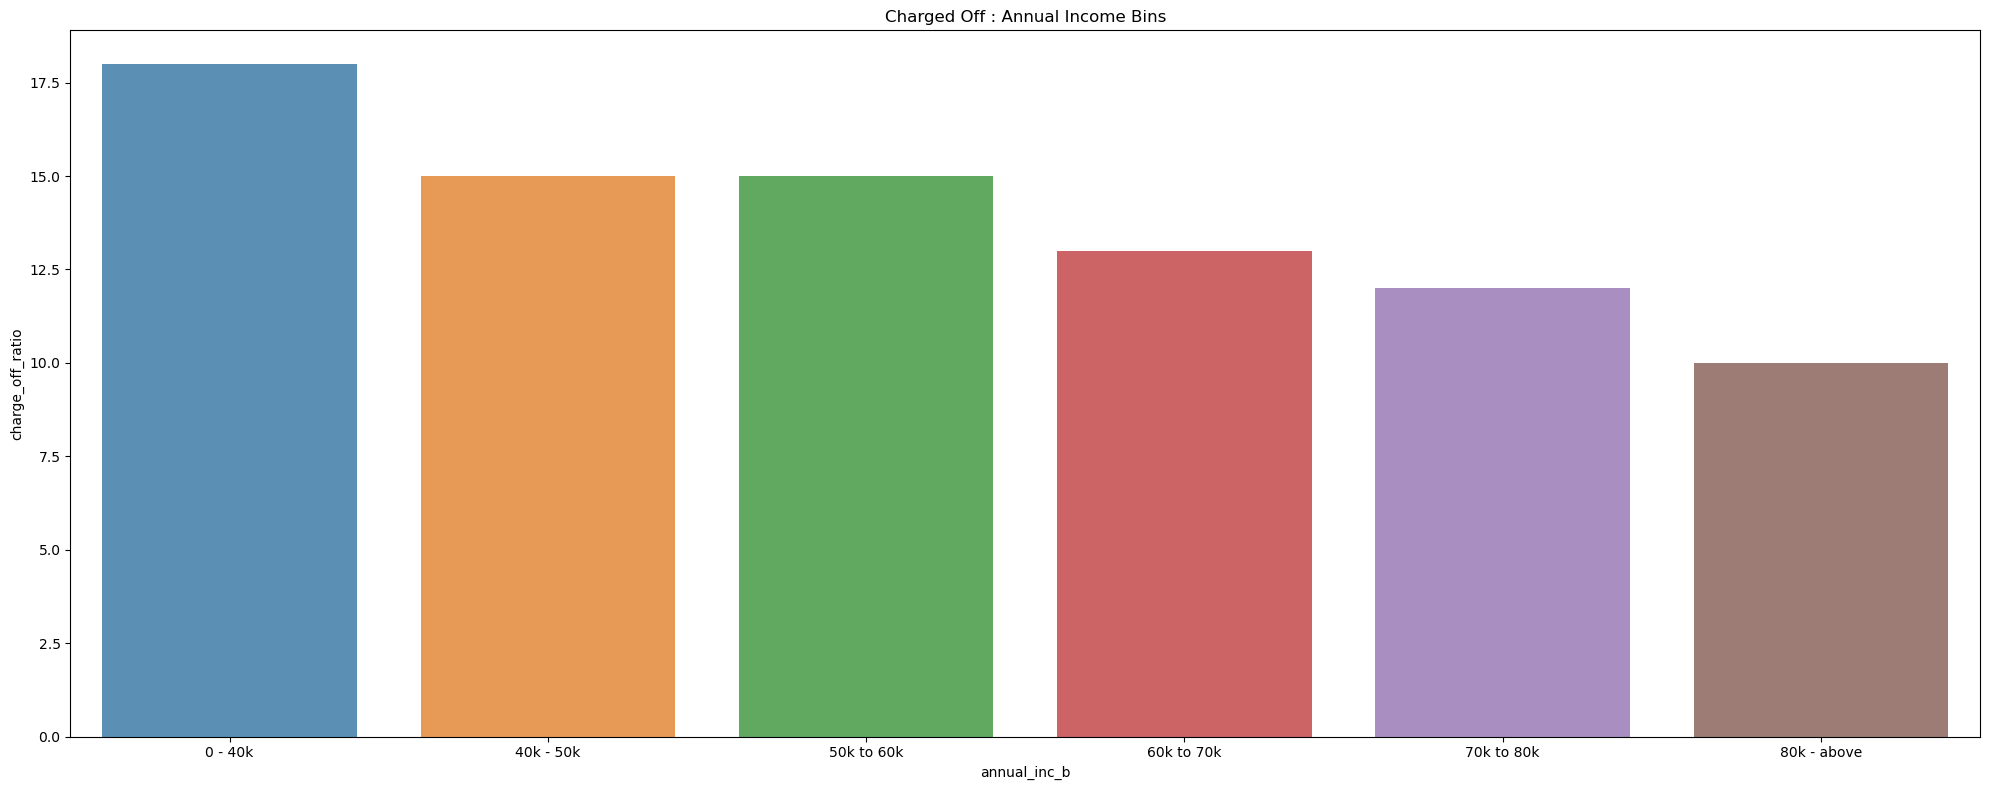

loan_status,annual_inc_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1570,7326,8896,18.0
1,40k - 50k,807,4593,5400,15.0
2,50k to 60k,788,4435,5223,15.0
3,60k to 70k,486,3261,3747,13.0
4,70k to 80k,385,2749,3134,12.0
5,80k - above,664,5992,6656,10.0


In [238]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'annual_inc_b')

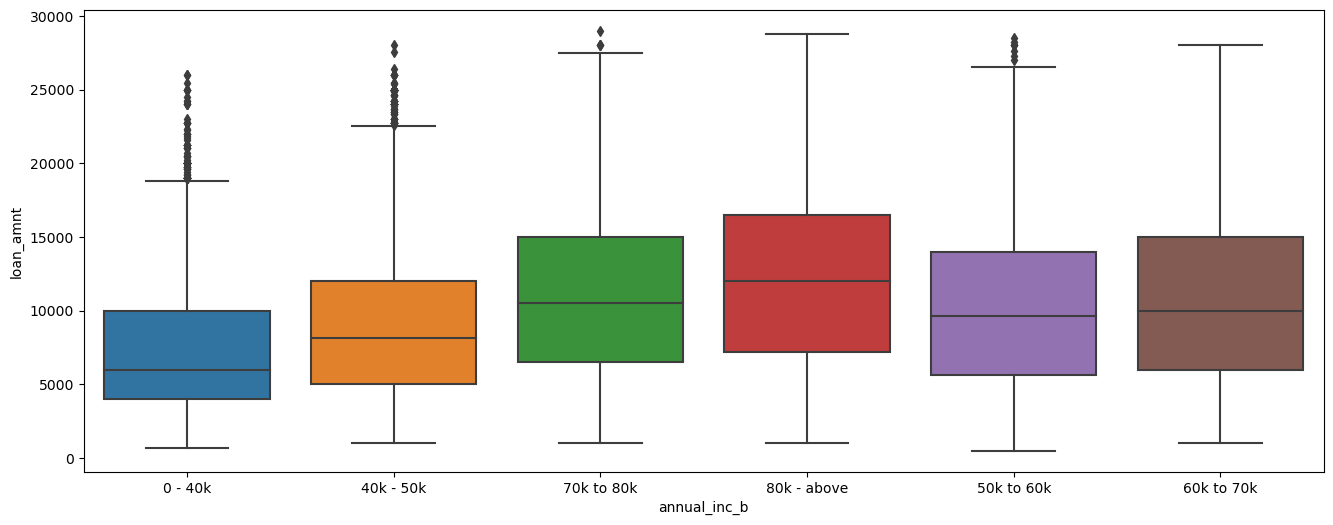

In [239]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.annual_inc_b)
plot.show()

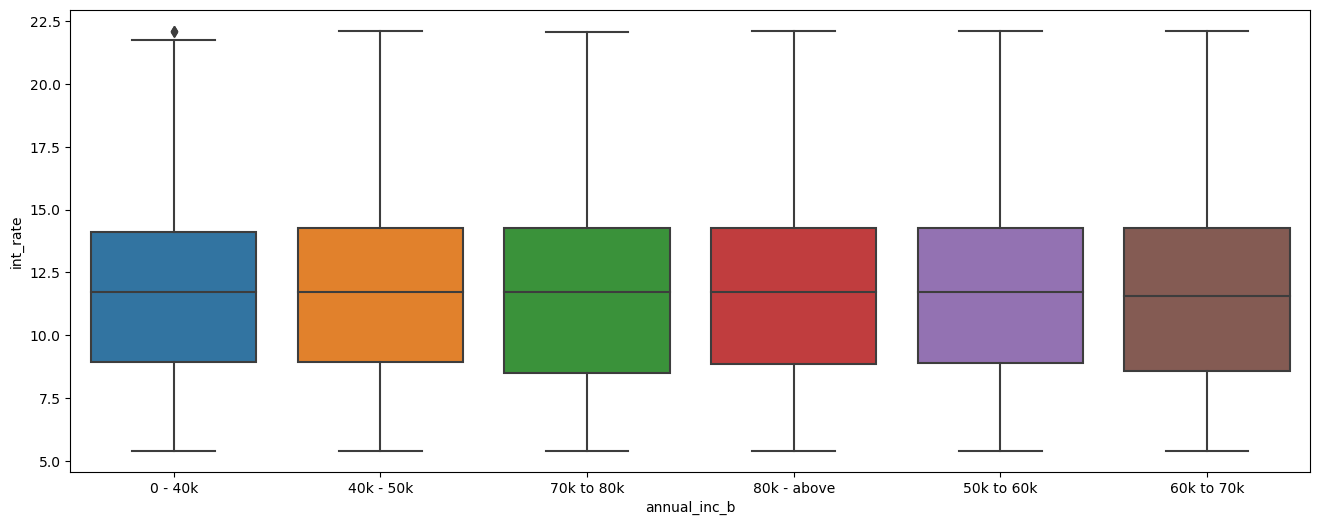

In [240]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.int_rate,x=loan_df.annual_inc_b)
plot.show()

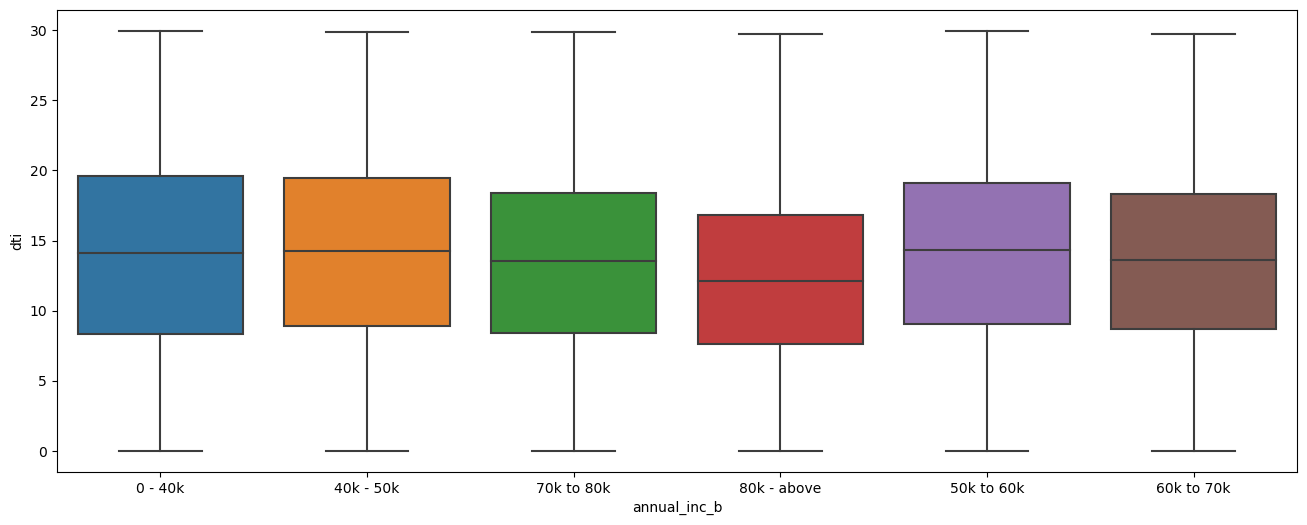

In [241]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.dti,x=loan_df.annual_inc_b)
plot.show()

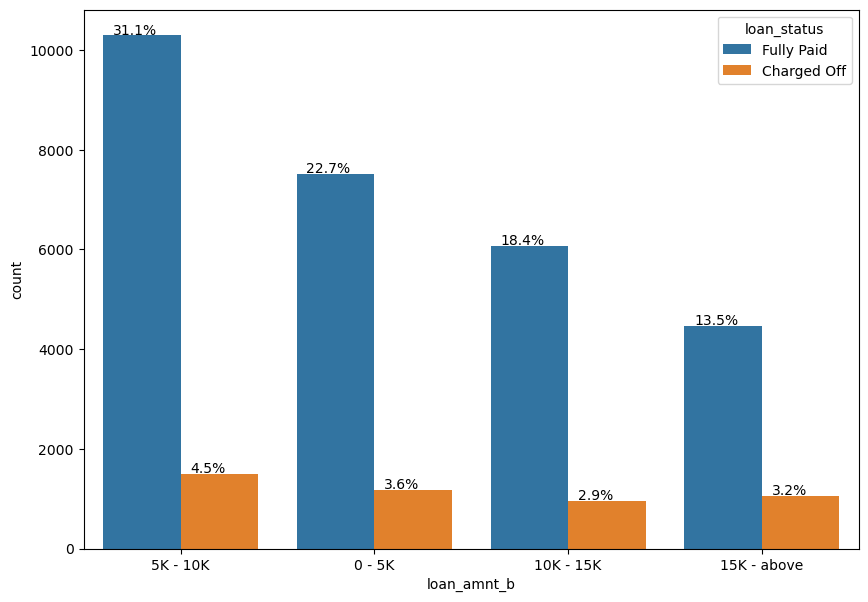

In [242]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'loan_amnt_b', 'loan_status')

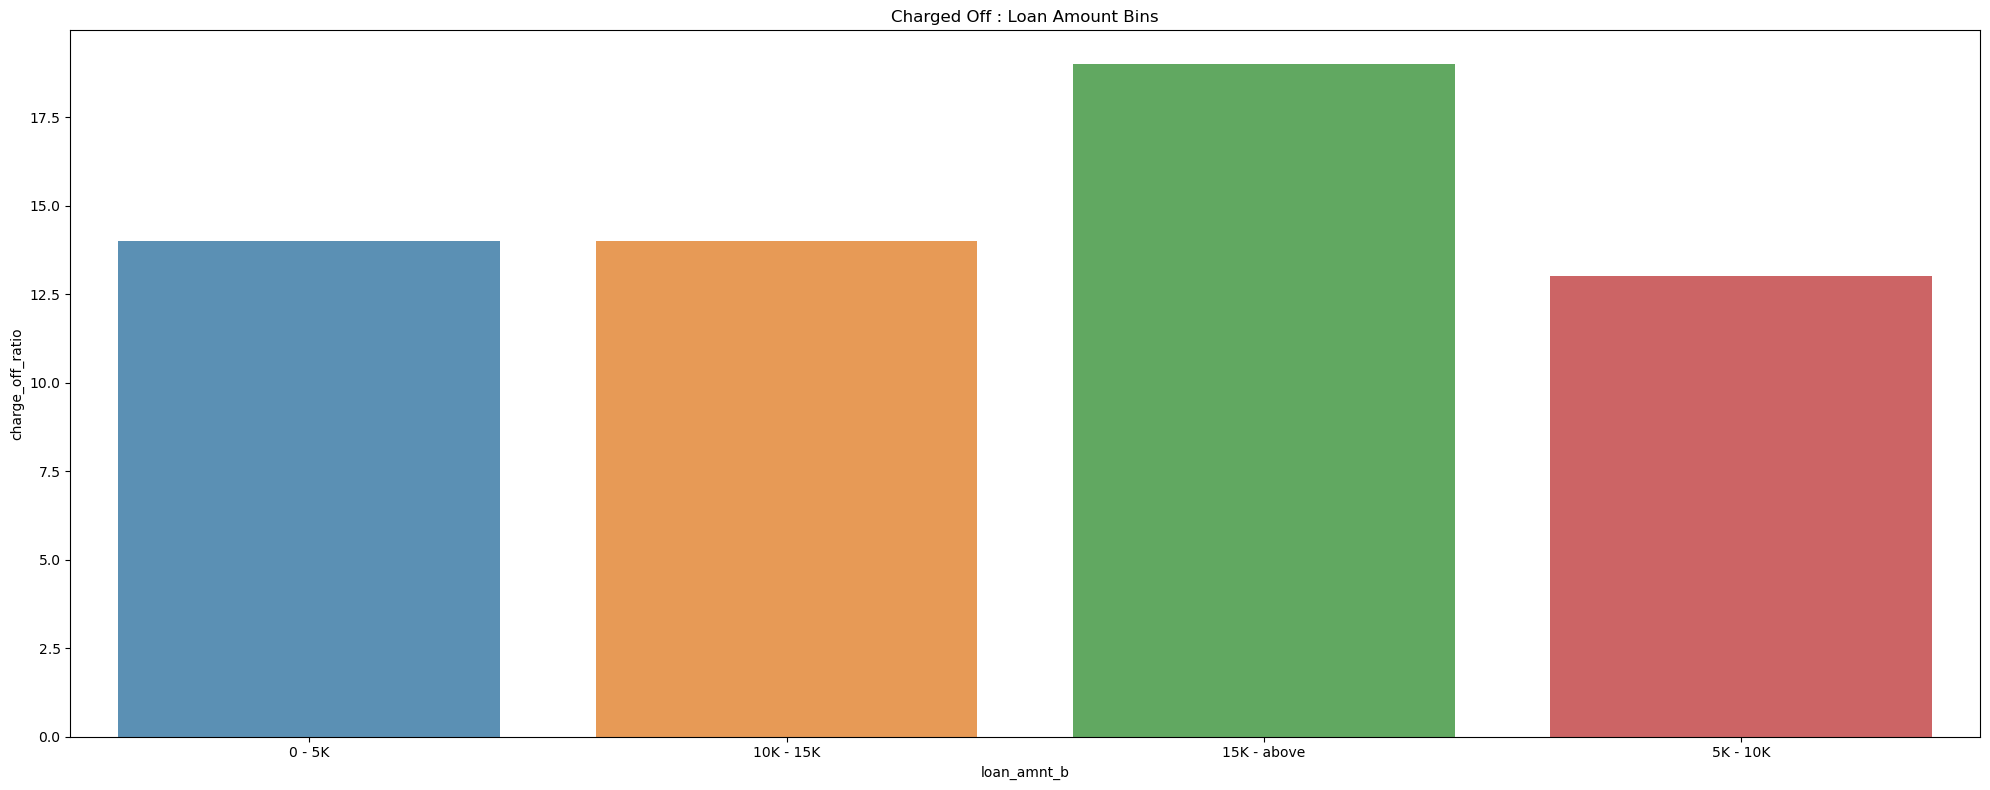

loan_status,loan_amnt_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 5K,1180,7520,8700,14.0
1,10K - 15K,954,6077,7031,14.0
2,15K - above,1063,4466,5529,19.0
3,5K - 10K,1503,10293,11796,13.0


In [243]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'loan_amnt_b')

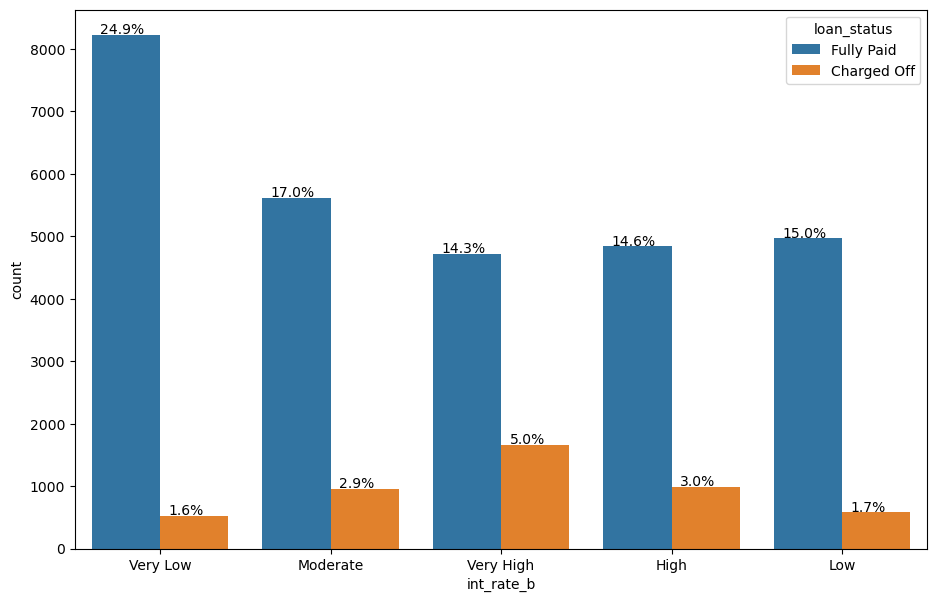

In [244]:
# Overall Charge Offs ratio against the total
series_plot(loan_df, 'int_rate_b', 'loan_status')

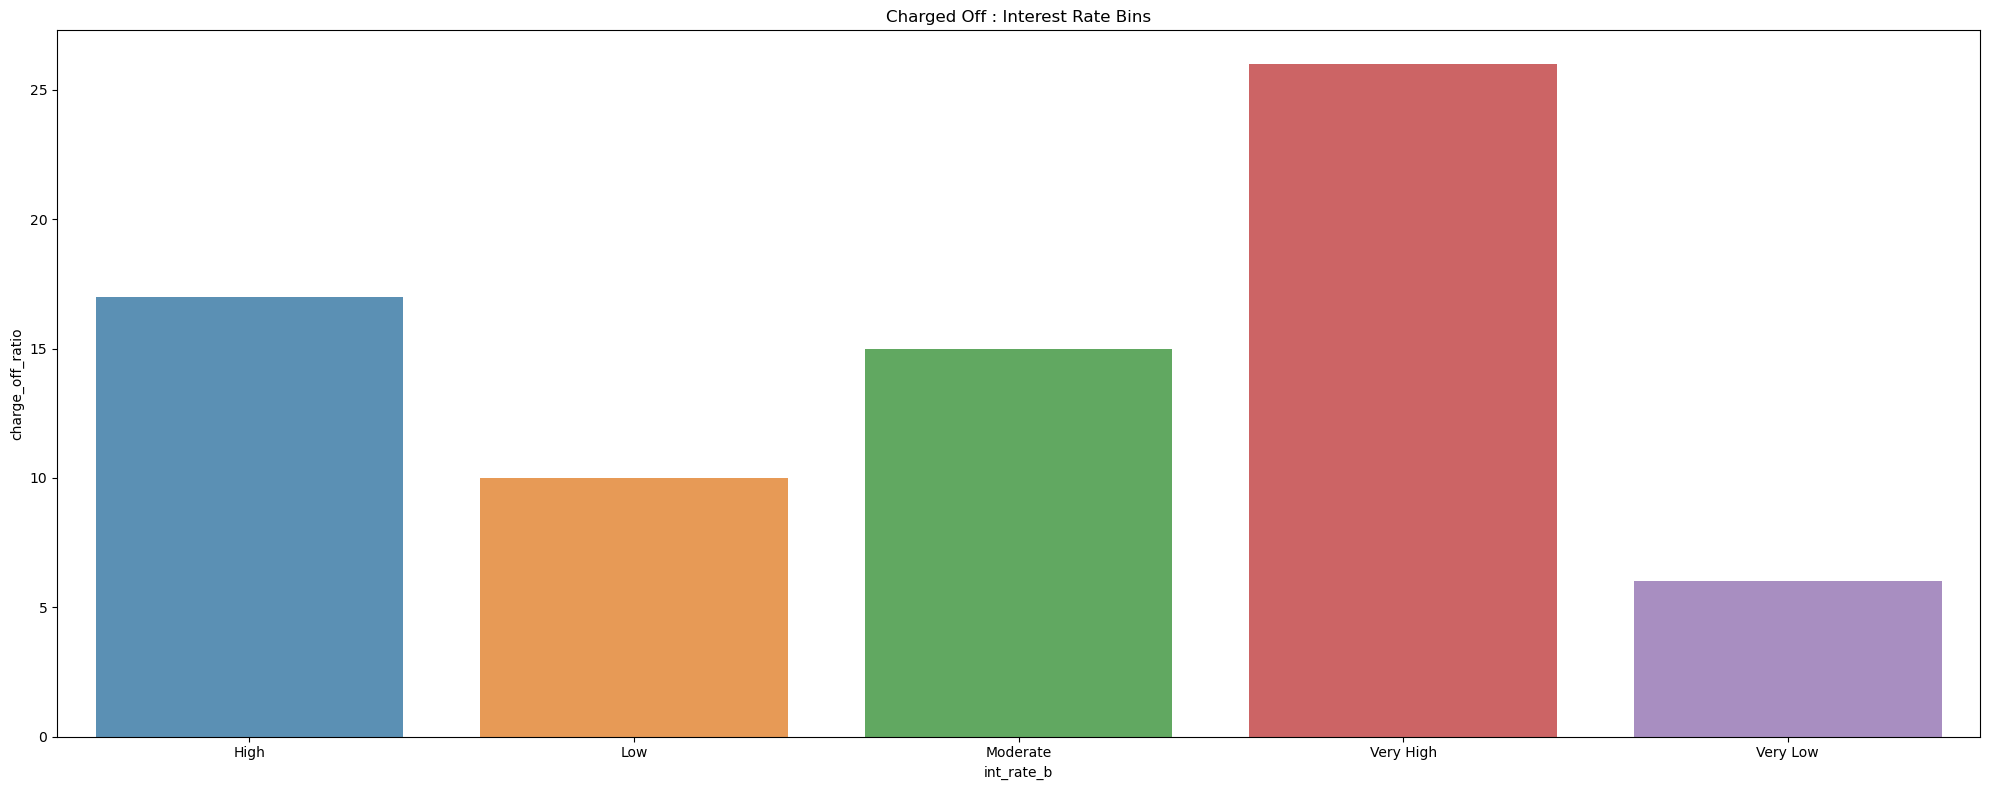

loan_status,int_rate_b,Charged Off,Fully Paid,total,charge_off_ratio
0,High,981,4837,5818,17.0
1,Low,578,4964,5542,10.0
2,Moderate,958,5618,6576,15.0
3,Very High,1665,4721,6386,26.0
4,Very Low,518,8216,8734,6.0


In [245]:
# The Charge Offs ratio within the category total
ratio_wise_plot(loan_df, 'int_rate_b')

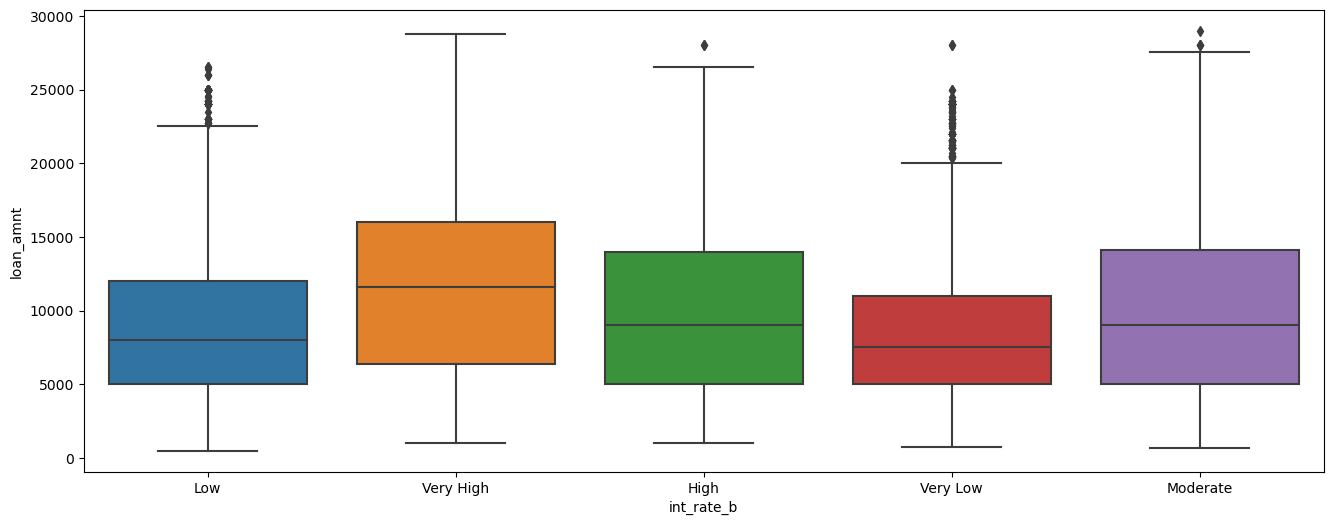

In [246]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan_df.loan_amnt,x=loan_df.int_rate_b)
plot.show()

In [247]:
correllation_loan = loan_df
# Printing info of column to analyse missing values and empty values.
print(correllation_loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33056 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33056 non-null  int64         
 1   loan_amnt             33056 non-null  float64       
 2   term                  33056 non-null  int64         
 3   int_rate              33056 non-null  float64       
 4   installment           33056 non-null  float64       
 5   grade                 33056 non-null  object        
 6   sub_grade             33056 non-null  object        
 7   emp_length            33056 non-null  float64       
 8   home_ownership        33056 non-null  object        
 9   annual_inc            33056 non-null  float64       
 10  verification_status   33056 non-null  object        
 11  issue_d               33056 non-null  datetime64[ns]
 12  loan_status           33056 non-null  object        
 13  purpose         

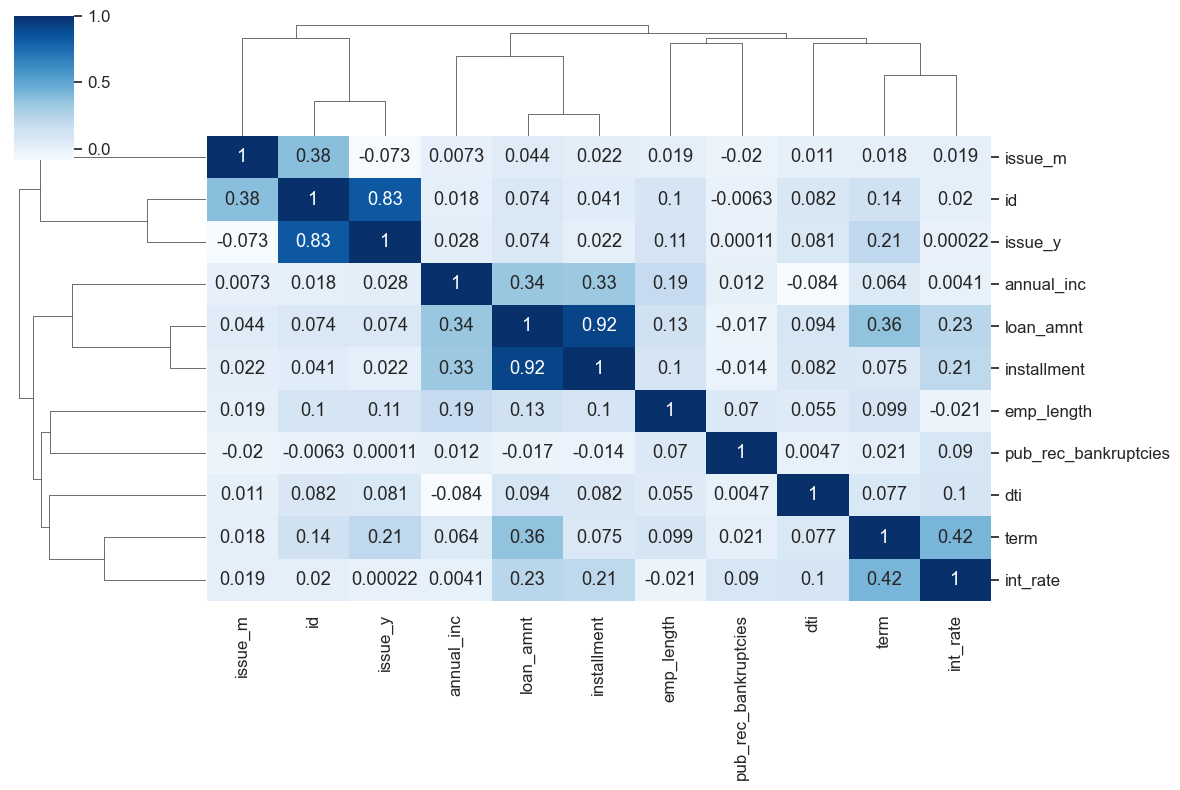

In [248]:
correllation = correllation_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(correllation, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [249]:
# Cleanning_Data
# Dropping redundant fields related to the 'loan_amnt'. They show high correlation in the corr-matrix
# Dropping fields issue_y, issue_m and id
drop_columns = ['installment', 'id', 'issue_y', 'issue_m']
correllation_loan = correllation_loan.drop(columns=drop_columns)

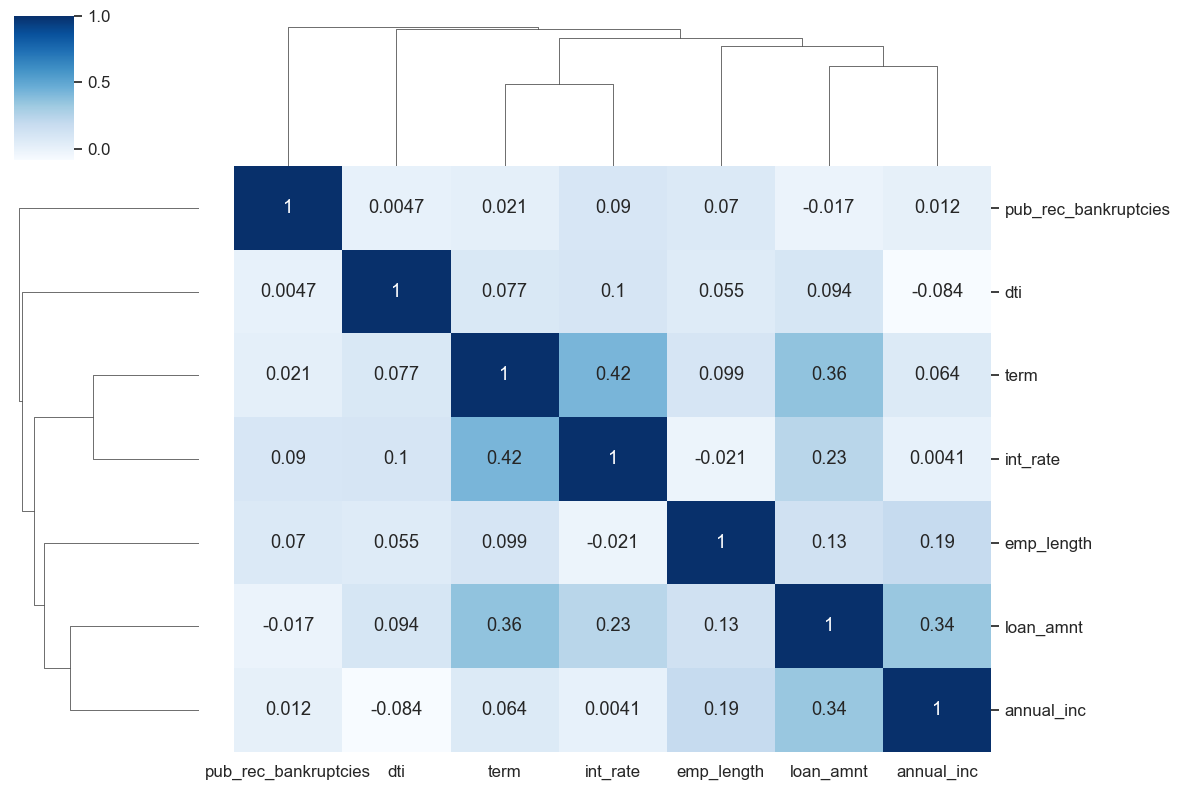

In [250]:
correllation = correllation_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(correllation, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

<Axes: xlabel='term', ylabel='loan_amnt'>

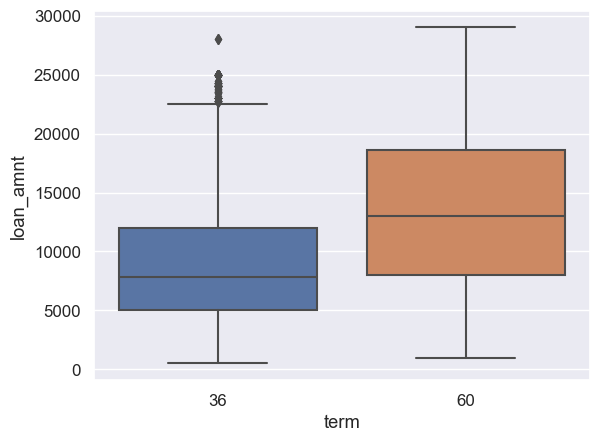

In [251]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=correllation_loan)

<Axes: xlabel='term', ylabel='int_rate'>

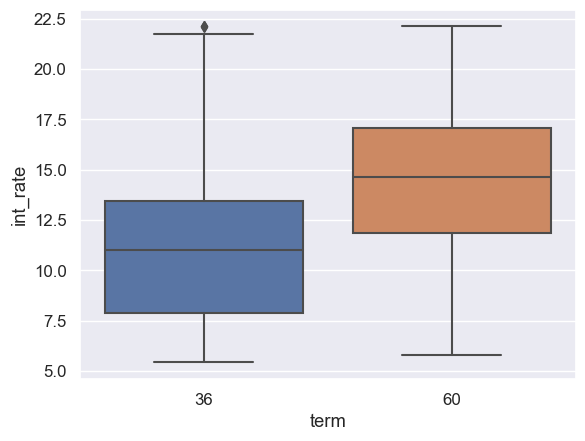

In [252]:
sea.boxplot(x = 'term', y = 'int_rate', data=correllation_loan)

<Axes: xlabel='term', ylabel='int_rate'>

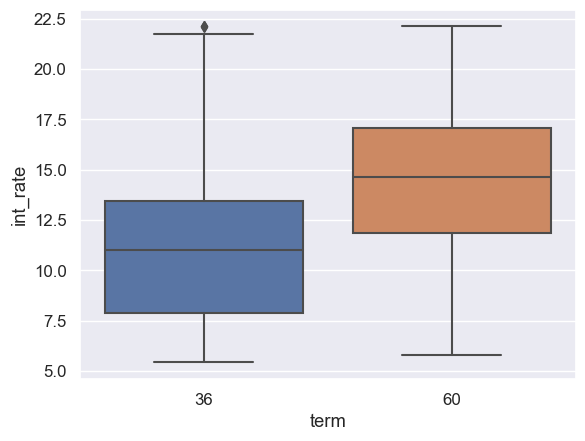

In [253]:
sea.boxplot(x = 'term', y = 'int_rate', data=correllation_loan)

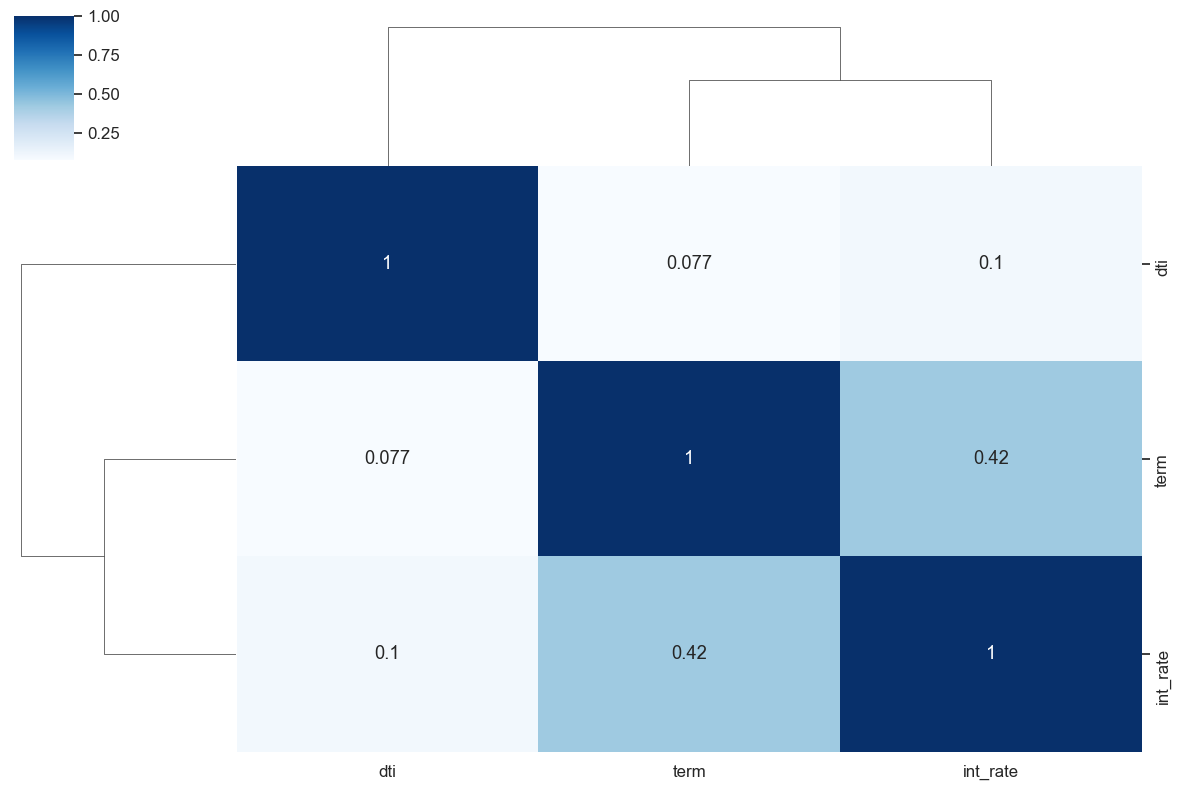

In [254]:
correllation = correllation_loan.loc[:, [ 'term', 'int_rate', 'dti']].corr()
sea.set(font_scale=1.1)
sea.clustermap(correllation, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

<Figure size 600x1000 with 0 Axes>

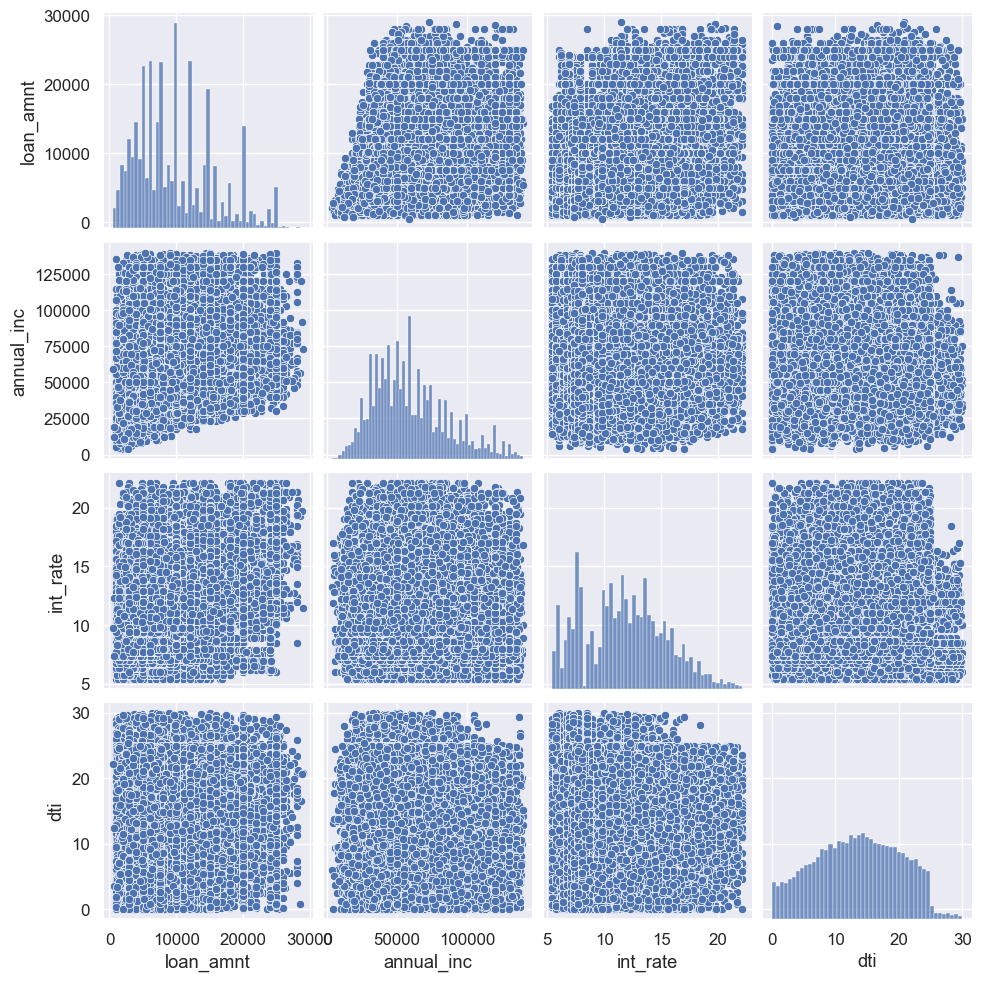

In [255]:
plot.figure(figsize=(6,10))
sea.pairplot(loan_df[['loan_amnt', 'annual_inc', 'int_rate', 'dti']])
plot.show()